# Initialisations

In [1]:
library(ggplot2)
library(corrplot)
library(cluster)
theme_set(theme_classic())

corrplot 0.84 loaded


# Plot Functions

In [2]:
adenome_boxplot <- function(df, feature_index, title){
  x_axis = colnames(df)[feature_index]
  caption = "Source : ADENOME-PROS"

  g <- ggplot(df, aes("", df[,feature_index]))
  g <- g + geom_boxplot(varwidth=T, fill="plum")
  g <- g + labs(title=title, 
         subtitle=x_axis,
         caption=caption,
         x=x_axis,
         y="")
  print(g)
}

adenome_scatterplot <- function(df, feature_1, feature_2, f1, f2) {
  x_axis = f1
  y_axis = f2
  title = paste(x_axis, " Vs. ", y_axis)
  caption = "Source : ADENOME-PROS"
  g <- ggplot(df, aes(x=feature_1, y=feature_2))
  g <- g + geom_point()
  g <- g + labs(title=title,y=y_axis,x=x_axis,caption=caption)
  print(g)
}

adenome_barplot <- function(df, feature_index, title) {
  caption = "Source : ADENOME-PROS"
  x_axis = colnames(df)[feature_index]
  g <- ggplot(df, aes(df[,feature_index]))
  g <- g + geom_bar(width = 0.5)
  g <- g + labs(title=title, 
         subtitle=x_axis,
         caption=caption,
         x=x_axis,
         y="")
  print(g)
}

adenome_piechart <- function(df, feature_index, title){
  bar <- ggplot(vapor, aes(x="", fill = factor(df[,feature_index]))) + geom_bar(width = 1)
  pie <- bar + coord_polar(theta = "y")
  print(pie)
}

# Cleanup & Data Preparation

# Pré-traitements

Les fichiers ont été transformés et nettoyés en CSV avant import dans R
La variable "résidu post mictionnel" comportant des valeurs nulles pour certains individus, nous avons mis des 0 à la place. Ces individus sont des individus qui sont porteurs de sonde et qui n'ont aucun résidu post-mictionnel.

# Préparation des datasets VAPOR

In [23]:
# Chargement du dataset de base
vapor<-read.csv(file = "datasets/VAPOR.csv", sep = ",")

# Cast des variables booléennes
vapor$Comorbidite<-as.logical(vapor$Comorbidite)
vapor$Porteur_Sonde<-as.logical(vapor$Porteur_Sonde)
vapor$Transfusion<-as.logical(vapor$Transfusion)
vapor$Caillotage<-as.logical(vapor$Caillotage)
vapor$Reprise_Bloc<-as.logical(vapor$Reprise_Bloc)

# Cast des variables catégoriques
vapor$Indication<-as.factor(vapor$Indication)
vapor$Anesthesie<-as.factor(vapor$Anesthesie)
vapor$Evenement<-as.factor(vapor$Evenement)
vapor$Technique<-as.factor(vapor$Technique)

# Cast des variables catégoriques ordonnées
vapor$QoL<-as.ordered(vapor$QoL)
vapor$X1M_QoL<-as.ordered(vapor$X1M_QoL)
vapor$X3M_QoL<-as.ordered(vapor$X3M_QoL)
vapor$X6M_QoL<-as.ordered(vapor$X6M_QoL)
vapor$X9M_QoL<-as.ordered(vapor$X9M_QoL)
vapor$X12M_QoL<-as.ordered(vapor$X12M_QoL)
vapor$X15M_QoL<-as.ordered(vapor$X15M_QoL)
vapor$X18M_QoL<-as.ordered(vapor$X18M_QoL)

# 20 premières colonnes du dataset -> pré-opératoire, les dernières -> post-opératoire
vapor_pre<-vapor[,1:20]
vapor_post<-vapor[,21:41]

# On crée un dataframe ne comportant que les variables numériques (pour corrélation linéaire de Pearson)
vapor_num <- vapor[,sapply(vapor, function(x) is.numeric(x))]
vapor_num_pre = vapor_num[1:10]
vapor_num_post = vapor_num[11:24]

# On crée un dataframe ne comportant que les données booléennes, ordinales ou catégoriques
vapor_cat <- vapor[,sapply(vapor, function(x) is.ordered(x) | is.factor(x) | is.logical(x))]
vapor_cat = subset(vapor,select=c(Comorbidite,Porteur_Sonde,QoL,Indication,Anesthesie,Evenement,Technique,Transfusion,Caillotage,Reprise_Bloc,X1M_QoL,X3M_QoL,X6M_QoL,X9M_QoL,X12M_QoL,X15M_QoL,X18M_QoL))
vapor_cat_pre = vapor_cat[1:10]
vapor_cat_post = vapor_cat[11:17]

# Préparation des datasets RTUPB

In [24]:
rtupb<-read.csv(file = "datasets/RTUPB-VBPPS.csv", sep = ",")

# Cast des variables booléennes
rtupb$Comorbidite<-as.logical(rtupb$Comorbidite)
rtupb$Porteur_Sonde<-as.logical(rtupb$Porteur_Sonde)
rtupb$Transfusion<-as.logical(rtupb$Transfusion)
rtupb$Caillotage<-as.logical(rtupb$Caillotage)
rtupb$Reprise_Bloc<-as.logical(rtupb$Reprise_Bloc)

# Cast des variables catégoriques
rtupb$Indication<-as.factor(rtupb$Indication)
rtupb$Anesthesie<-as.factor(rtupb$Anesthesie)
rtupb$Evenement<-as.factor(rtupb$Evenement)
rtupb$Technique<-as.factor(rtupb$Technique)

# Cast des variables catégoriques ordonnées
rtupb$QoL<-as.ordered(rtupb$QoL)
rtupb$X1M_QoL<-as.ordered(rtupb$X1M_QoL)
rtupb$X3M_QoL<-as.ordered(rtupb$X3M_QoL)
rtupb$X6M_QoL<-as.ordered(rtupb$X6M_QoL)
rtupb$X9M_QoL<-as.ordered(rtupb$X9M_QoL)
rtupb$X12M_QoL<-as.ordered(rtupb$X12M_QoL)
rtupb$X15M_QoL<-as.ordered(rtupb$X15M_QoL)
rtupb$X18M_QoL<-as.ordered(rtupb$X18M_QoL)

# 20 premières colonnes du dataset -> pré-opératoire, les dernières -> post-opératoire
rtupb_pre<-rtupb[,1:20]
rtupb_post<-rtupb[,21:41]

# On crée un dataframe ne comportant que les variables numériques (pour corrélation linéaire de Pearson)
rtupb_num <- rtupb[,sapply(rtupb, function(x) is.numeric(x))]
rtupb_num_pre = rtupb_num[1:10]
rtupb_num_post = rtupb_num[11:24]

# On crée un dataframe ne comportant que les données booléennes, ordinales ou catégoriques
rtupb_cat <- rtupb[,sapply(rtupb, function(x) is.ordered(x) | is.factor(x) | is.logical(x))]
rtupb_cat_pre = rtupb_cat[1:10]
rtupb_cat_post = rtupb_cat[11:17]

# 1. Analyse des données Vapor
## 1.1 Pré-opératoire
### 1.1.1 Distributions

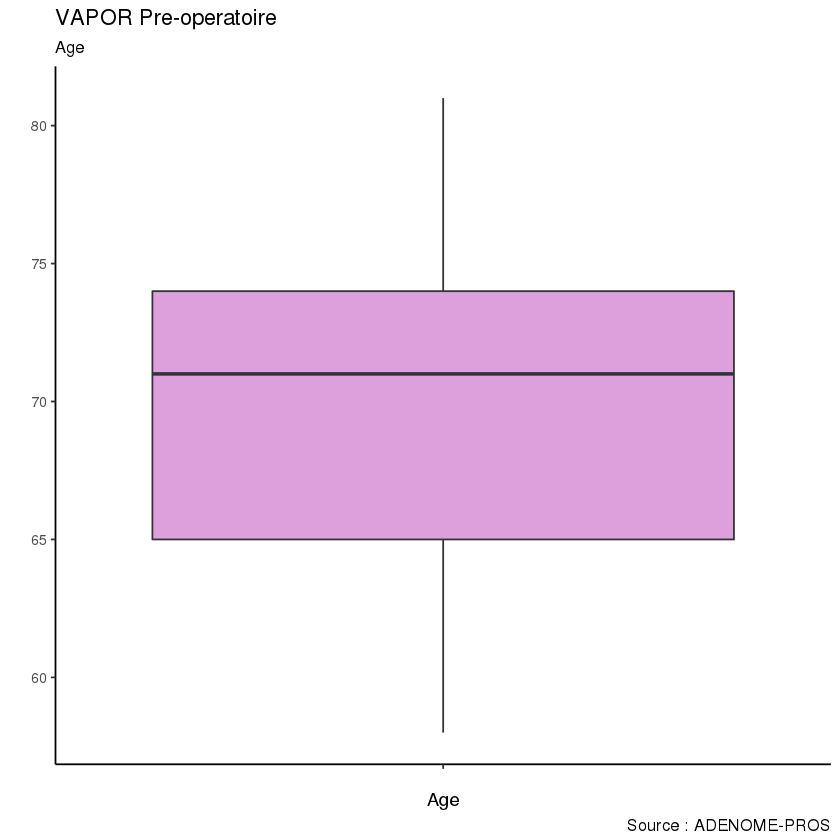

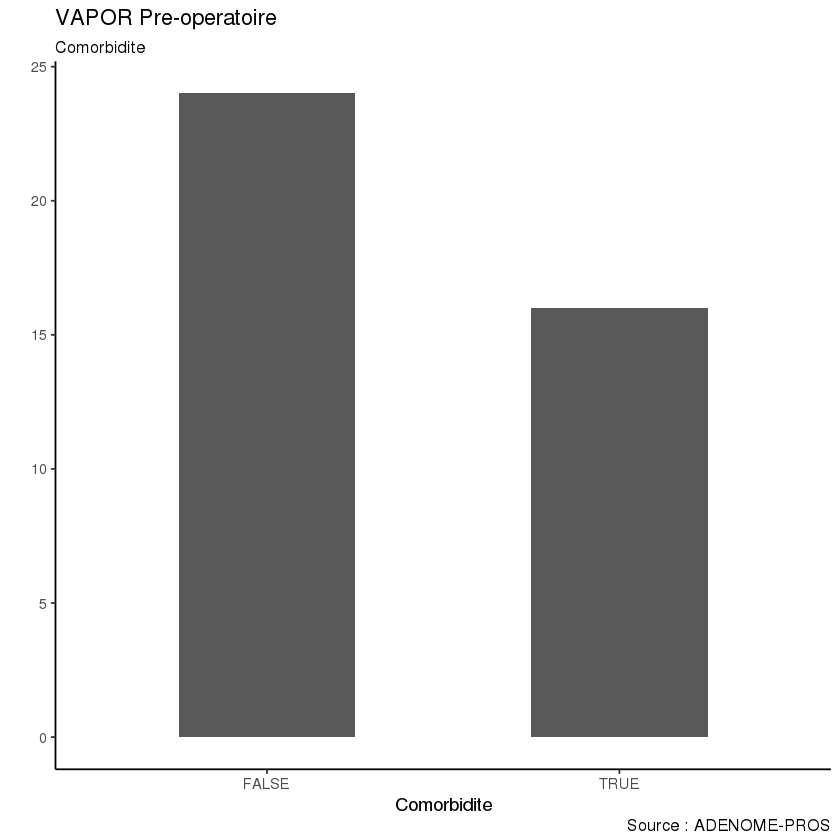

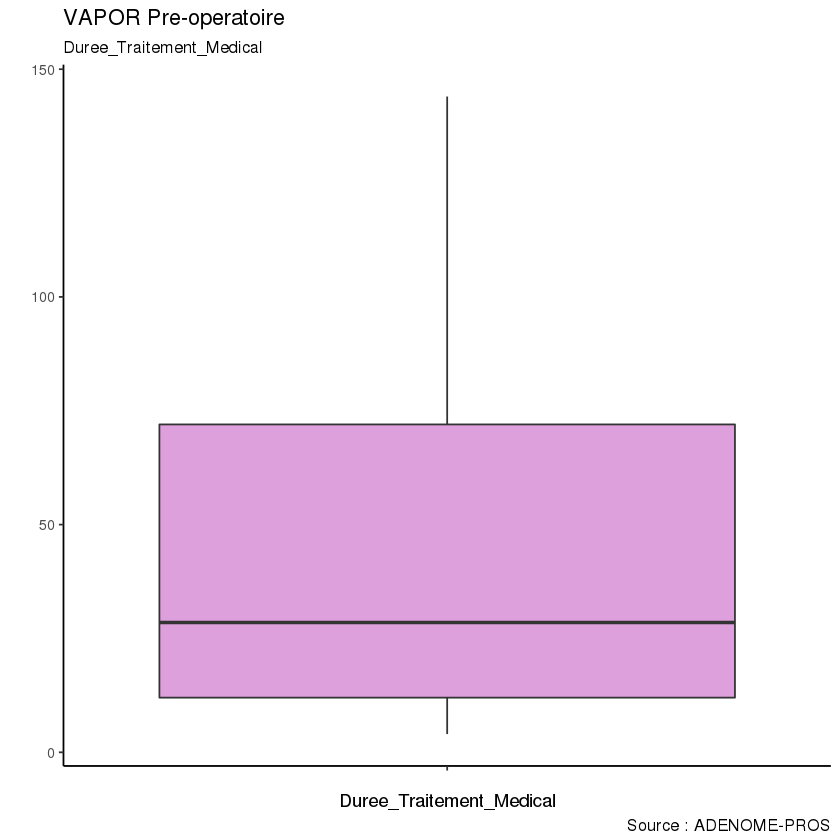

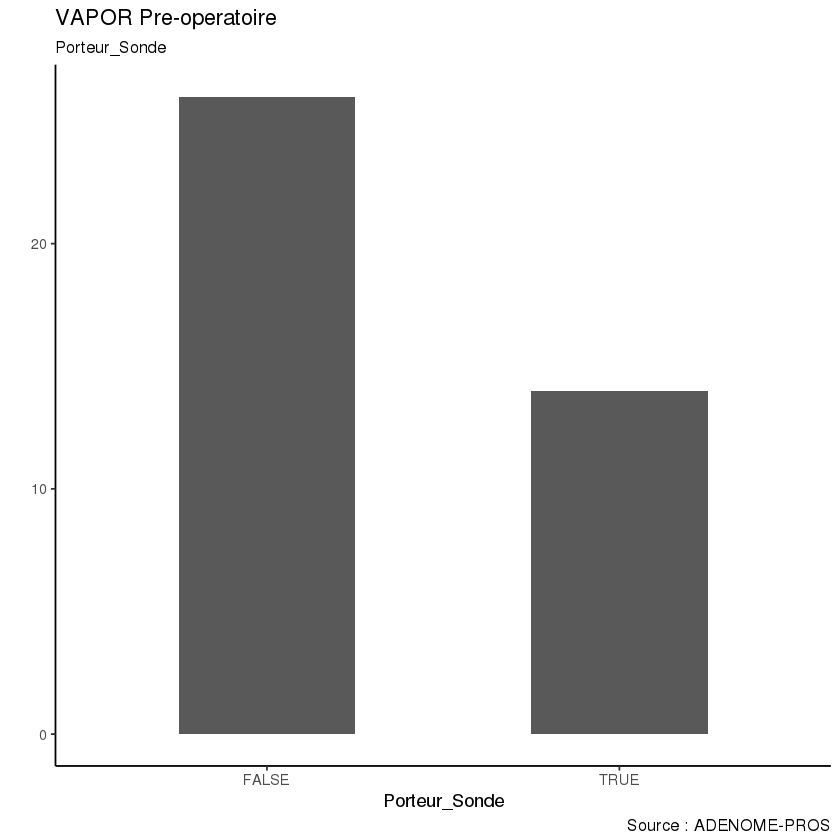

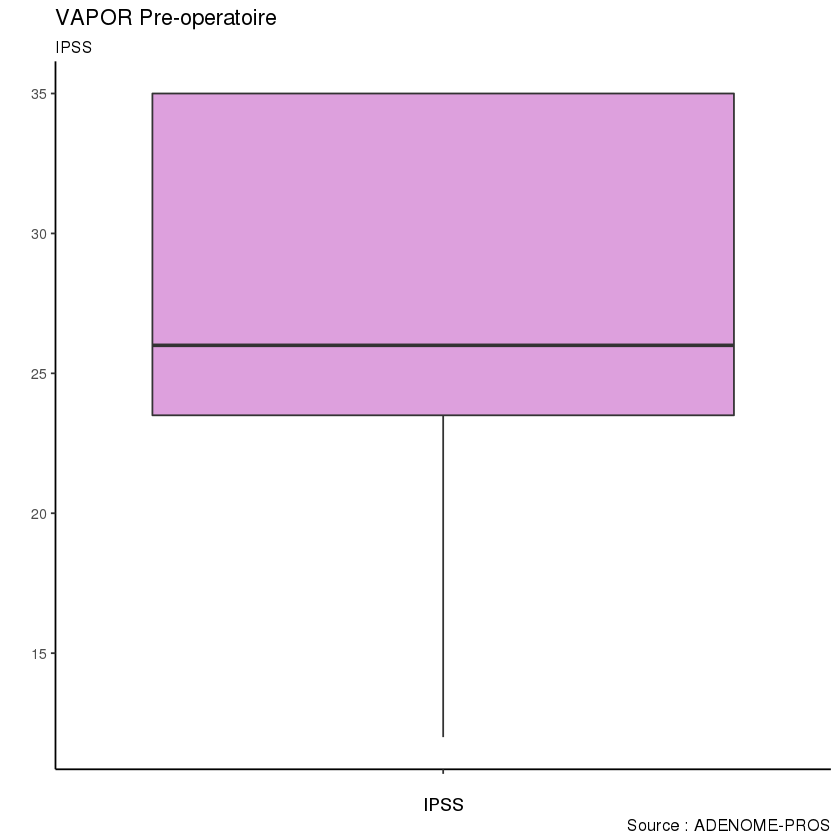

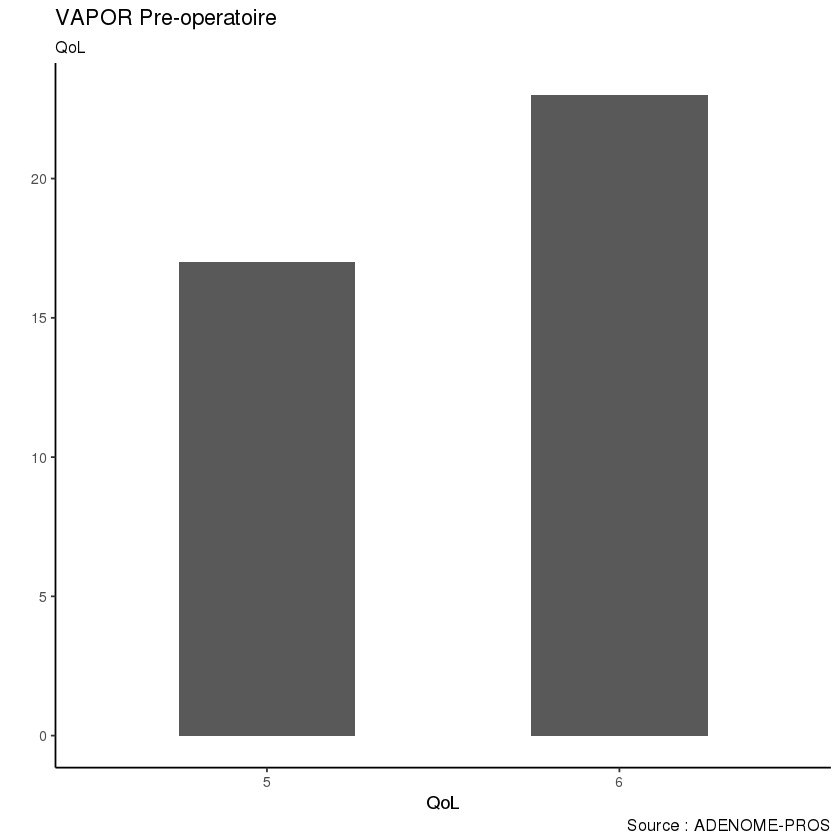

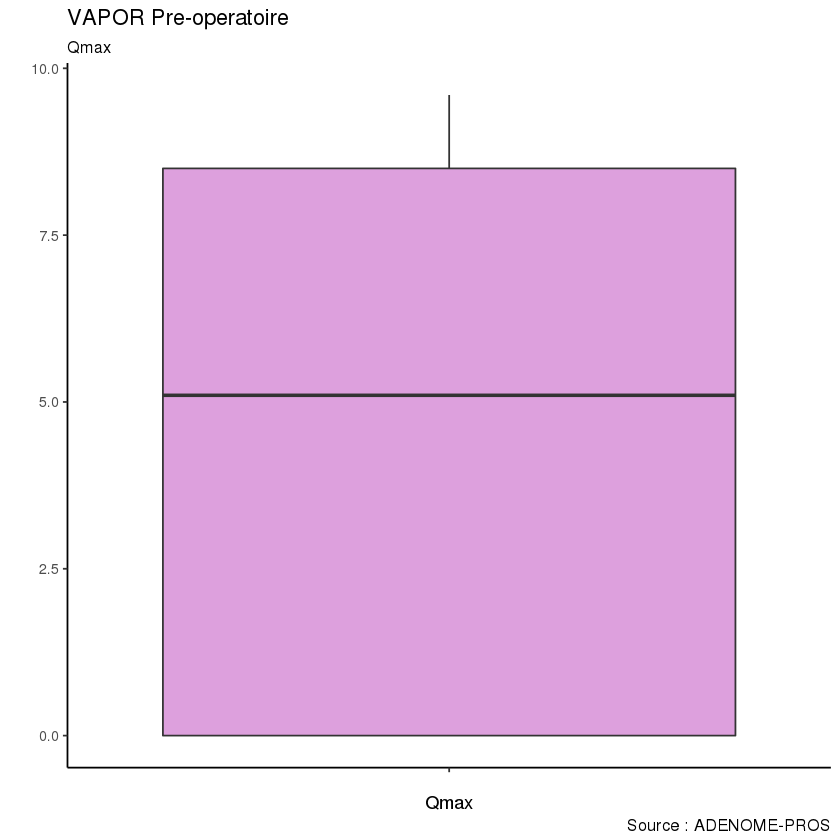

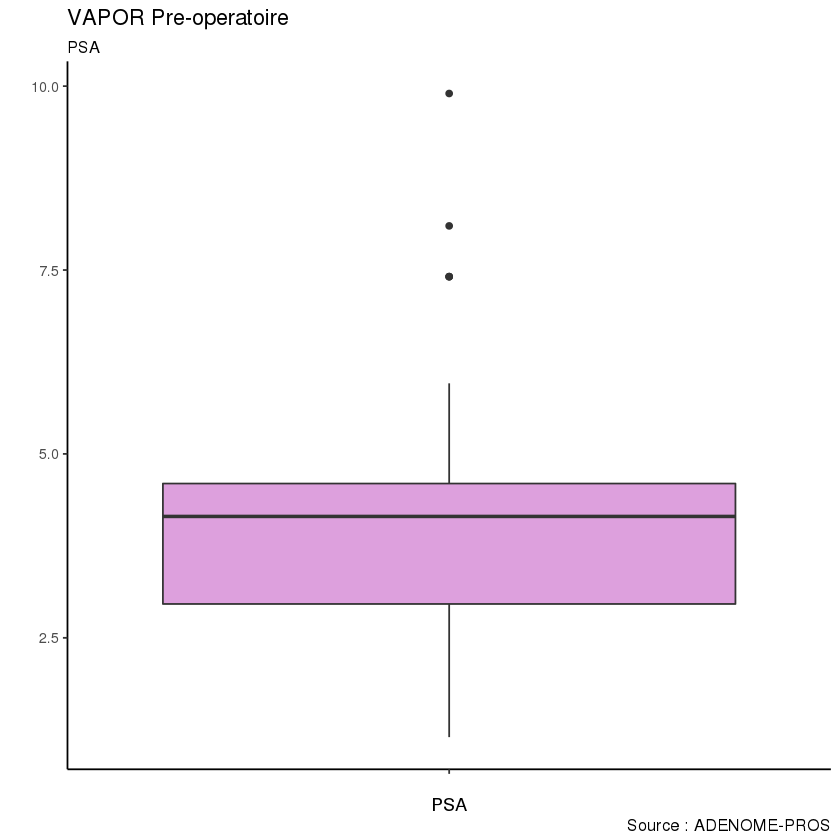

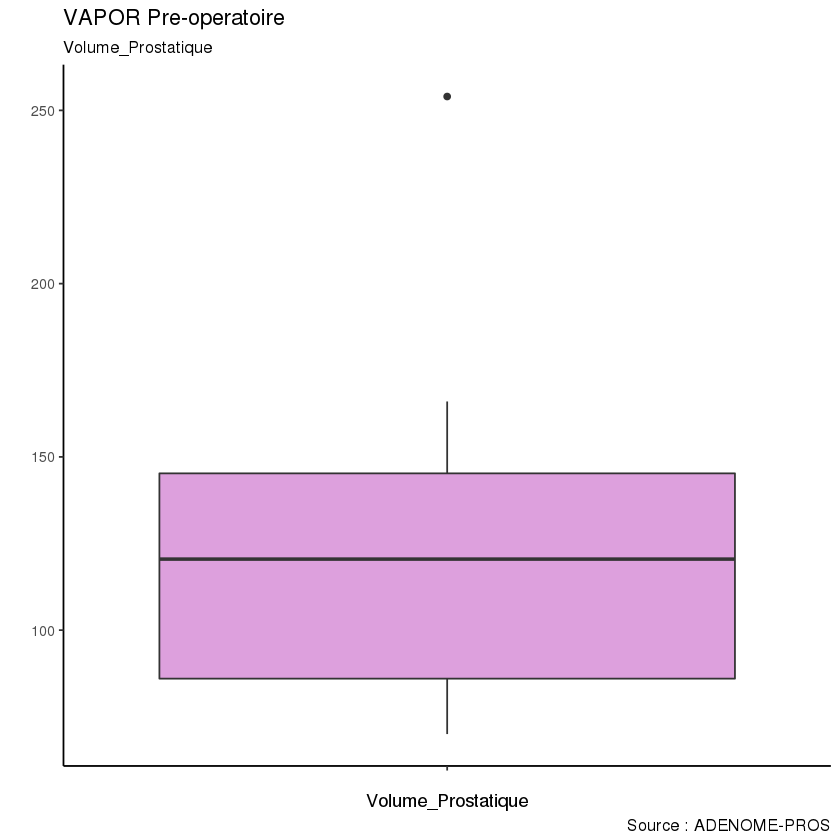

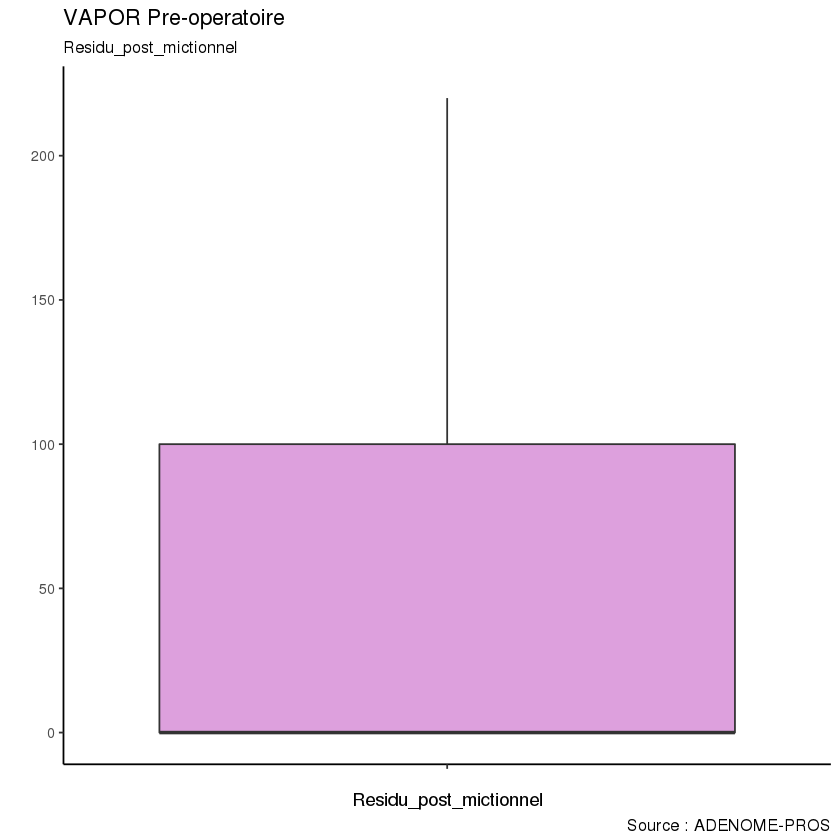

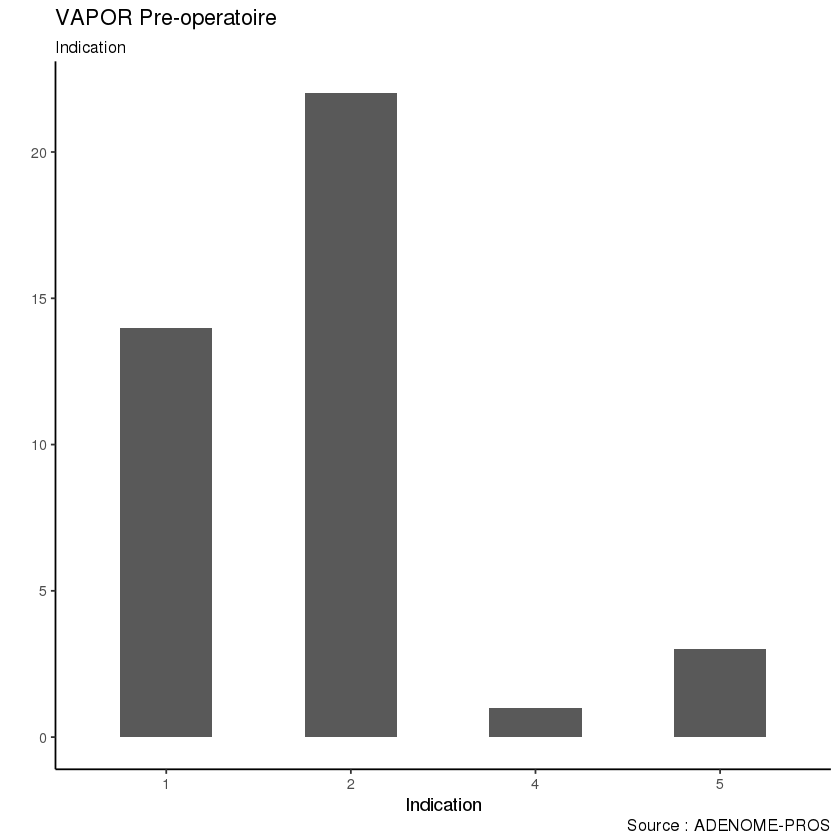

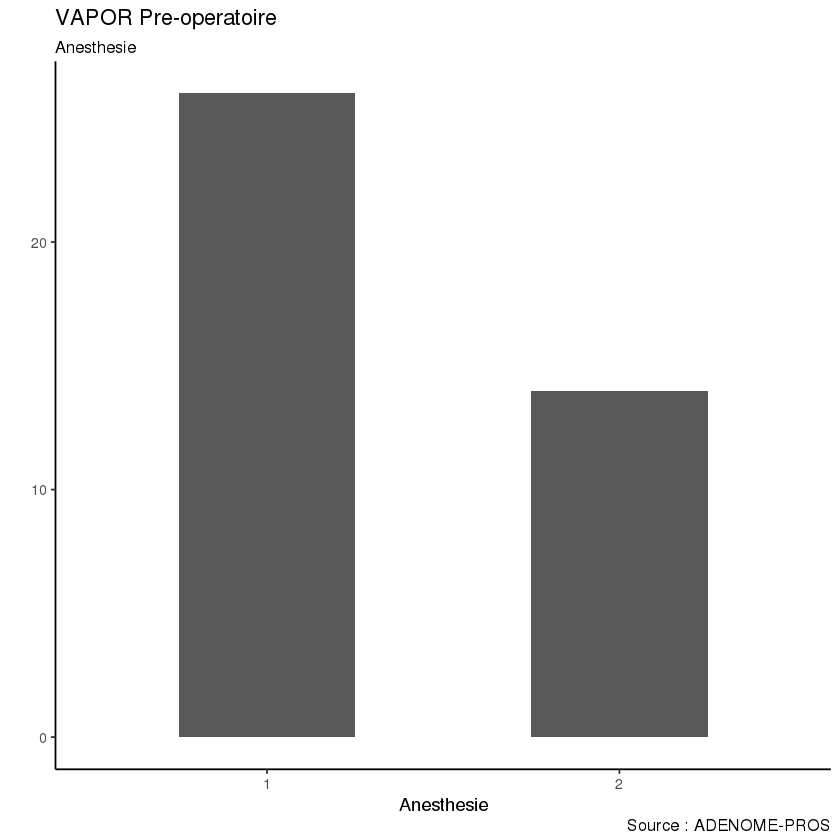

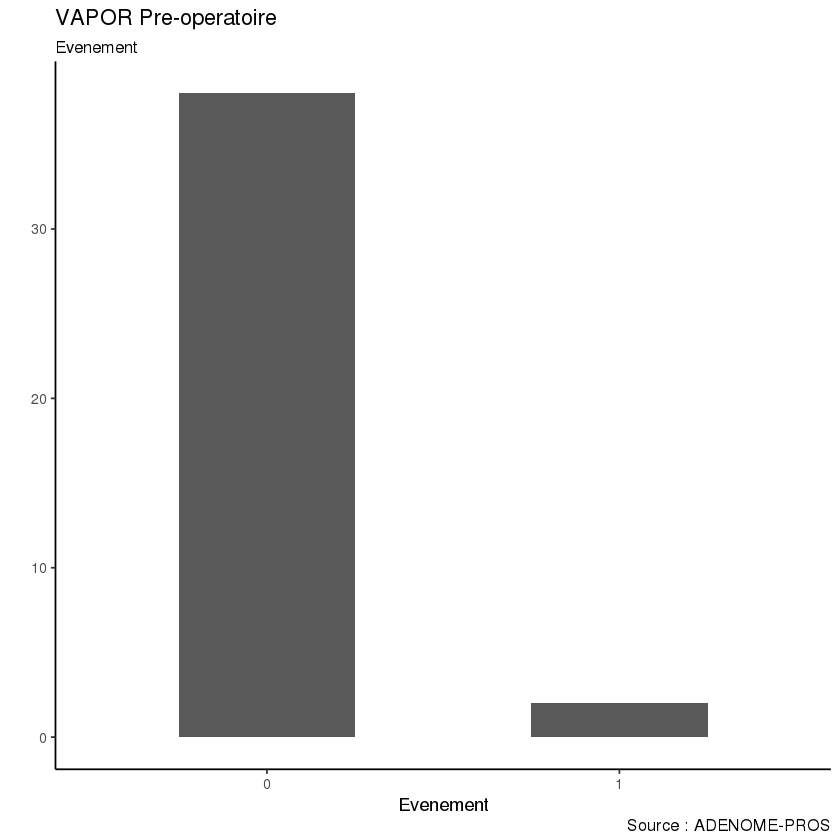

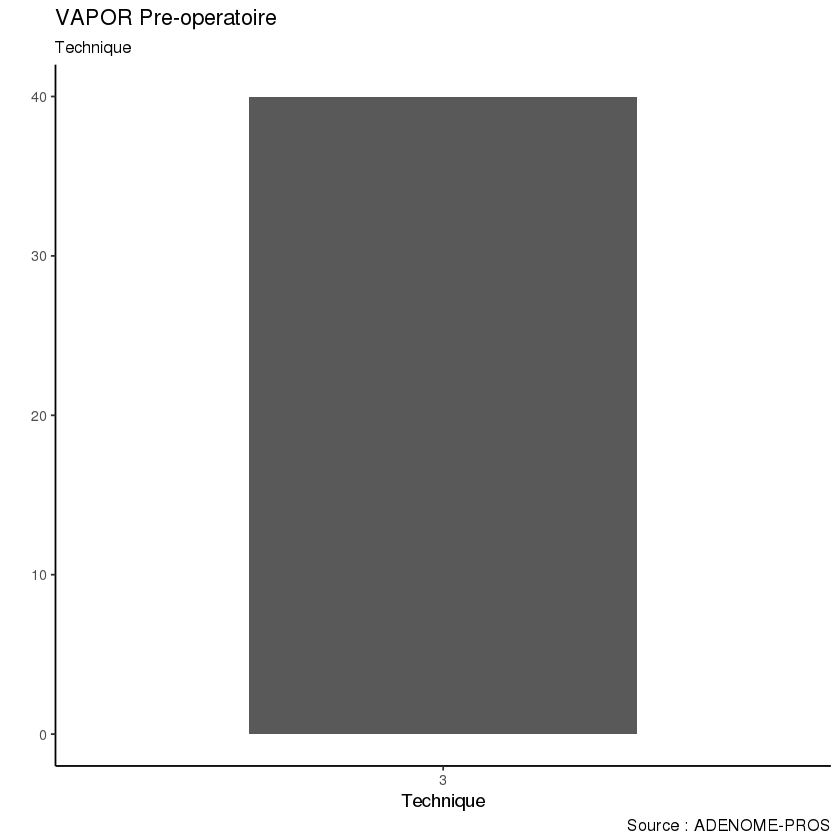

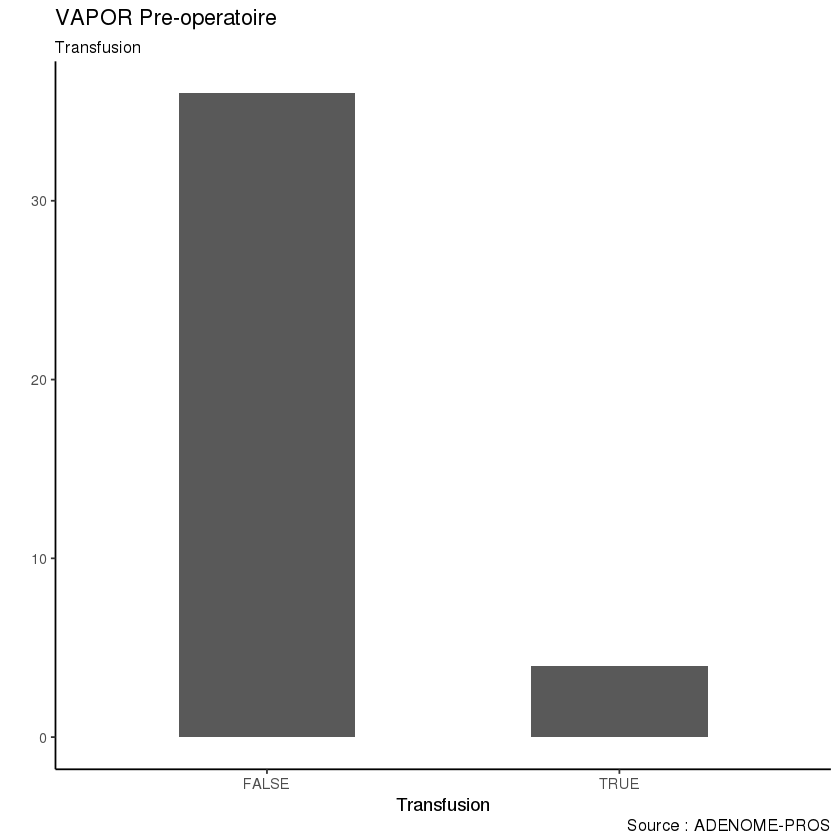

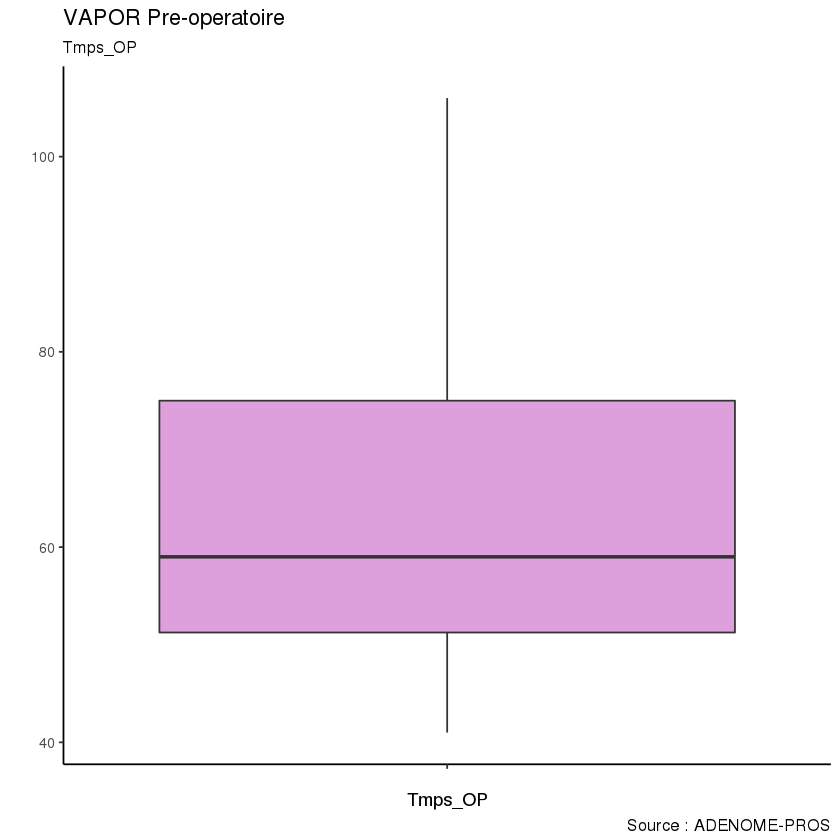

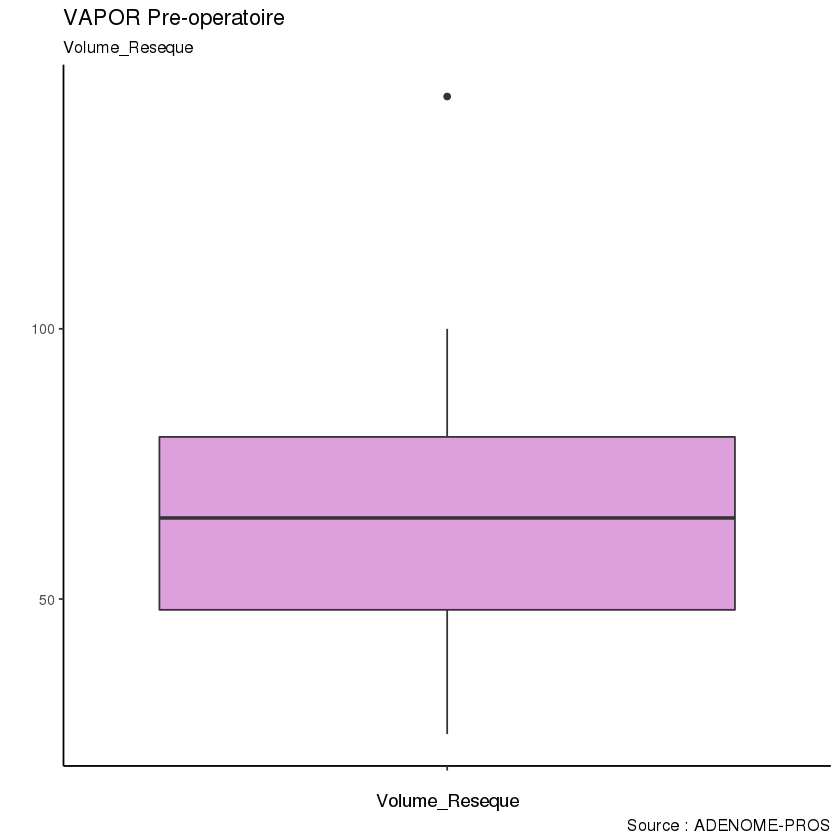

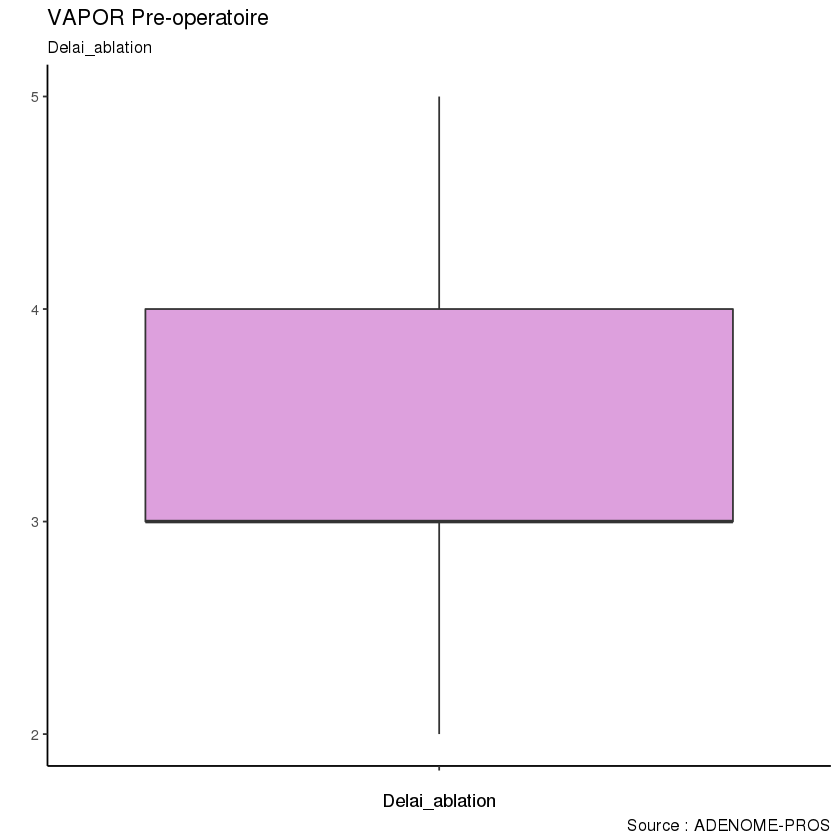

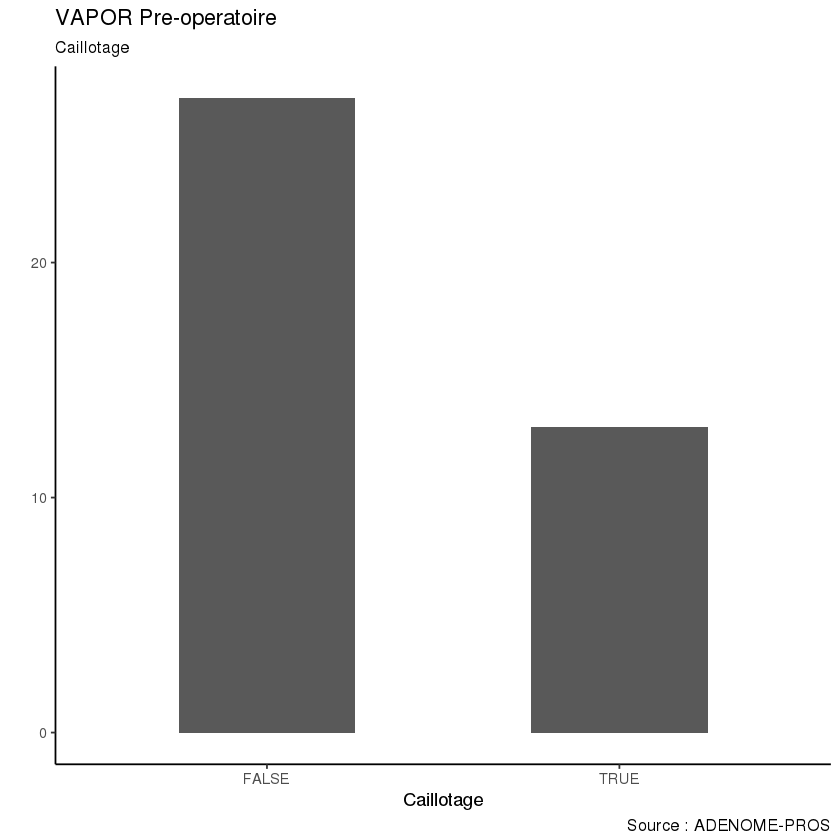

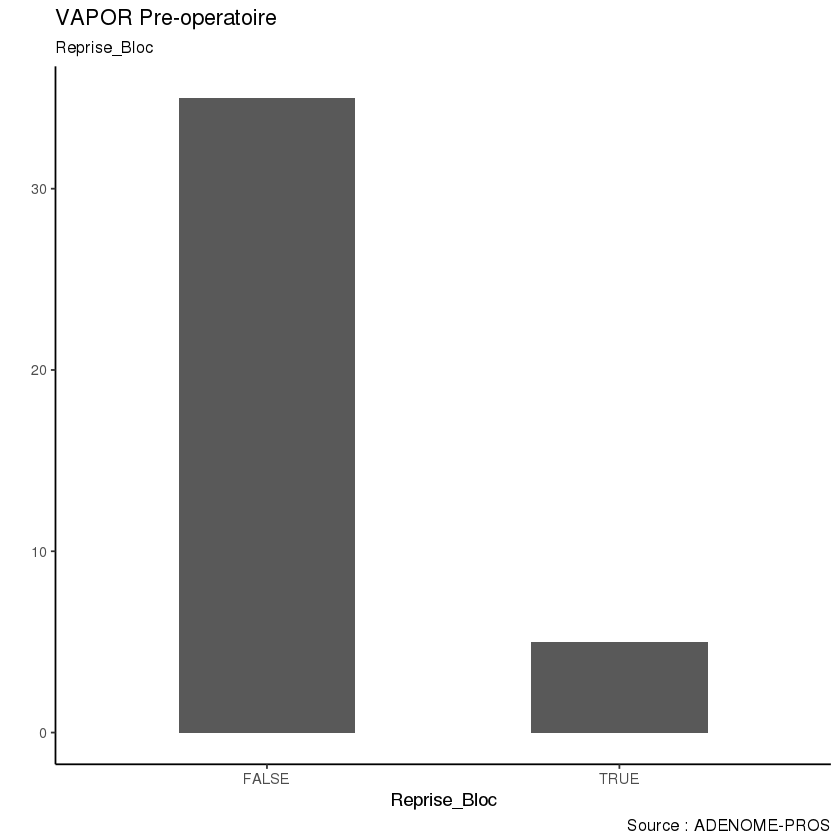

In [4]:
# Boxplots des variables numériques et barplots des variables catégoriques

for (i in 1:ncol(vapor_pre)) {
  #x11(display="")
  if (is.numeric(vapor_pre[,i]) || is.integer(vapor_pre[,i])) {
    adenome_boxplot(vapor_pre,i,"VAPOR Pre-operatoire")
  }
  else
    adenome_barplot(vapor_pre,i,"VAPOR Pre-operatoire")
}

### 1.1.2 Corrélations Pearson sur variables numériques

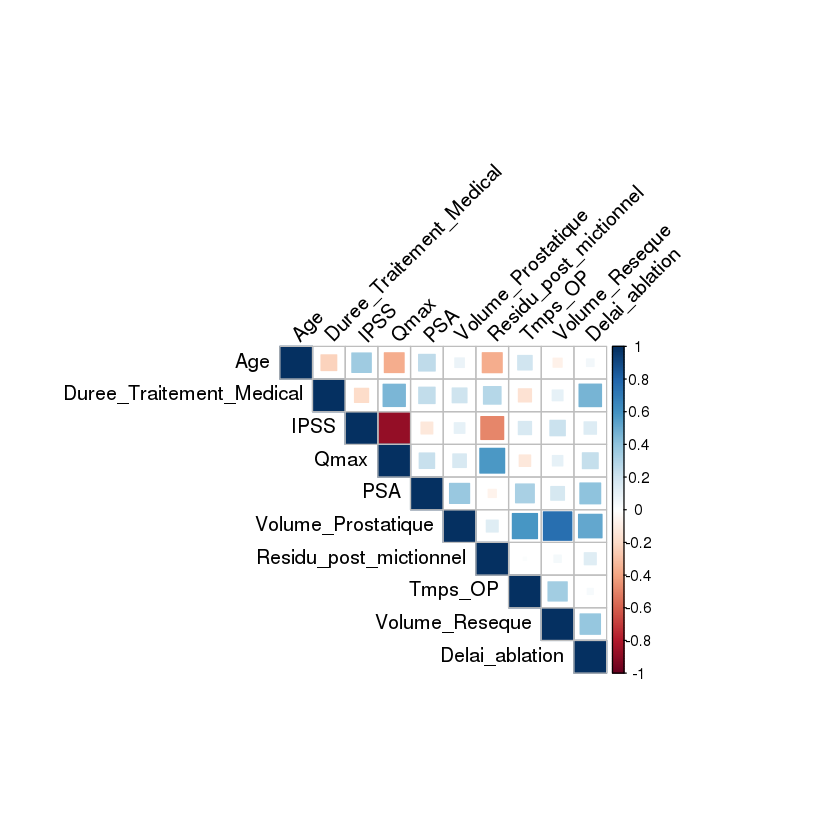

In [5]:
mat_cor_vapor_num_pre = cor(vapor_num_pre, method = c("pearson"))
corrplot(mat_cor_vapor_num_pre, type="upper",tl.col="black", tl.srt=45,method="square")

Pour la technique VAPOR, en pré-opératoire, nous notons une correlation entre le "Volume Résequé" et le "Volume prostatique" ainsi qu'une correlation négative entre "QMax"" et "IPSS". Plus la miction est bonne, plus la gêne est faible.
Dans une moindre mesure, nous notons une correlation entre "Volume prostatique" et les variables suivantes :
- Temps OP
- Delai Ablation
Nous notons enfin une correlation entre "Duree Traitement Medical" et "Delai Ablation".

Cette correlation peut être confirmée par les Scatterplots ci-dessous.

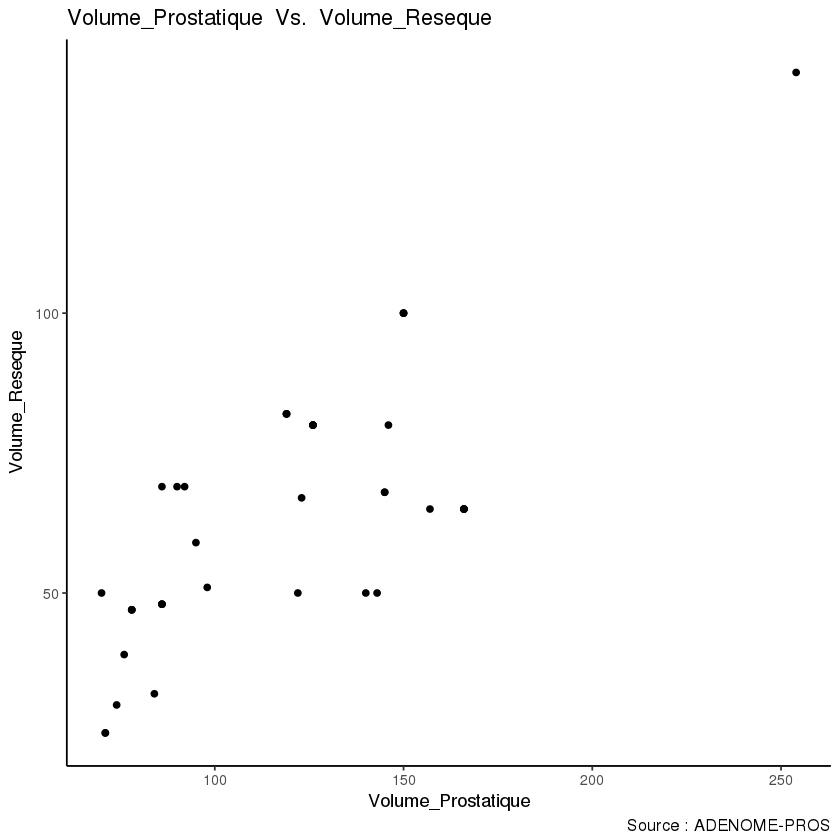

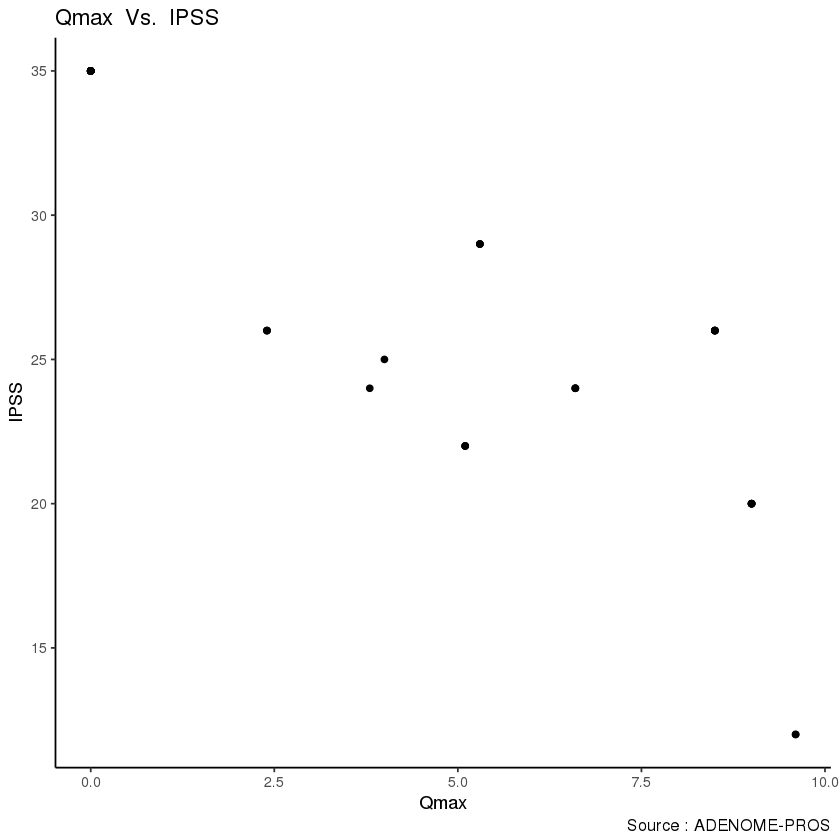

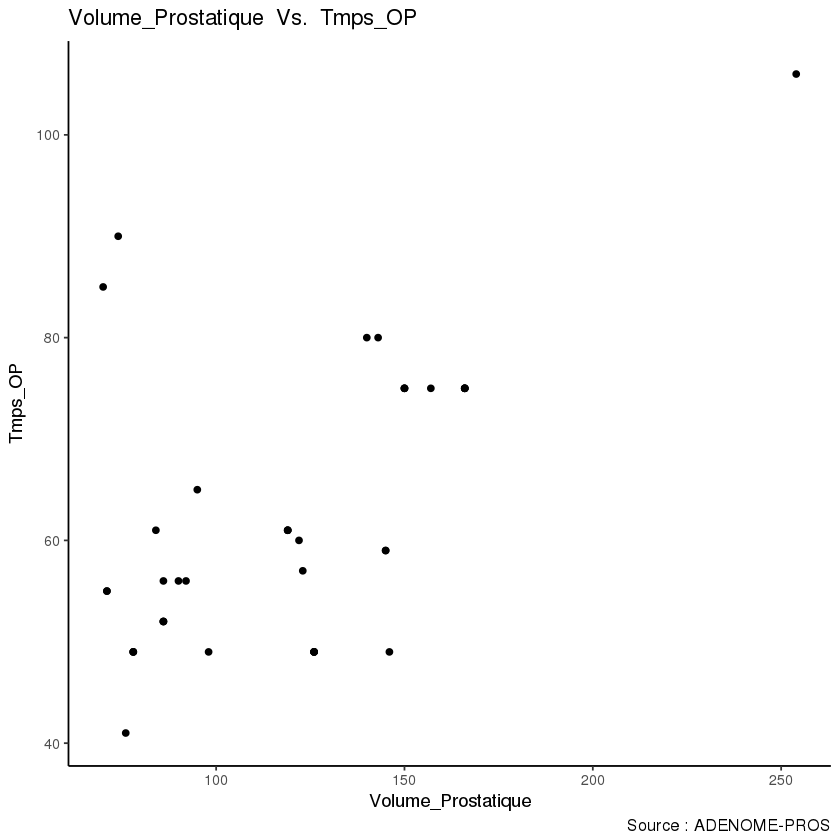

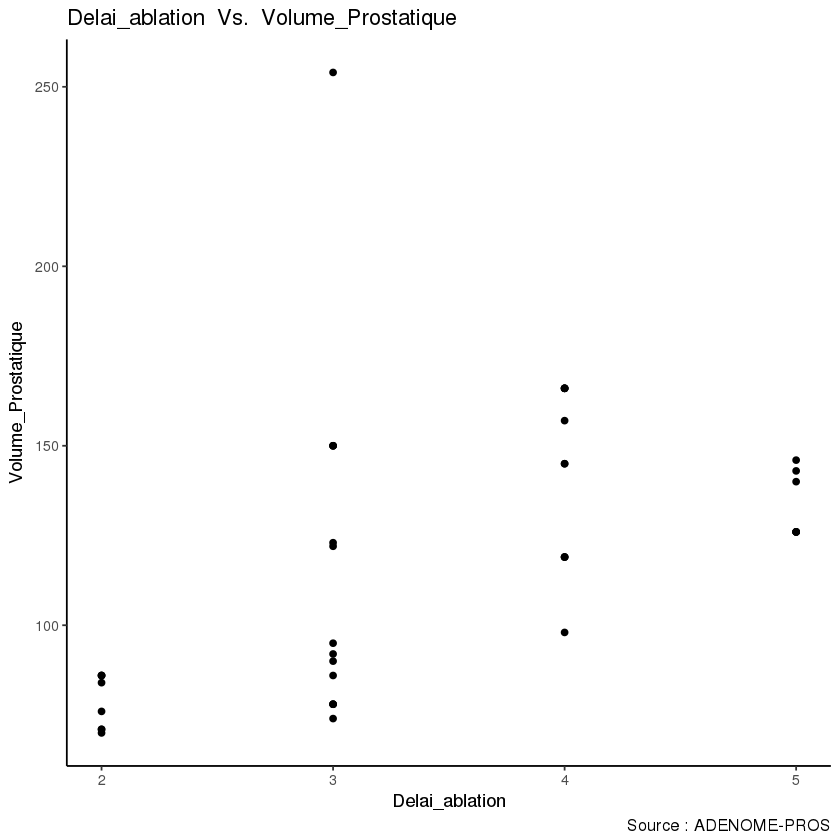

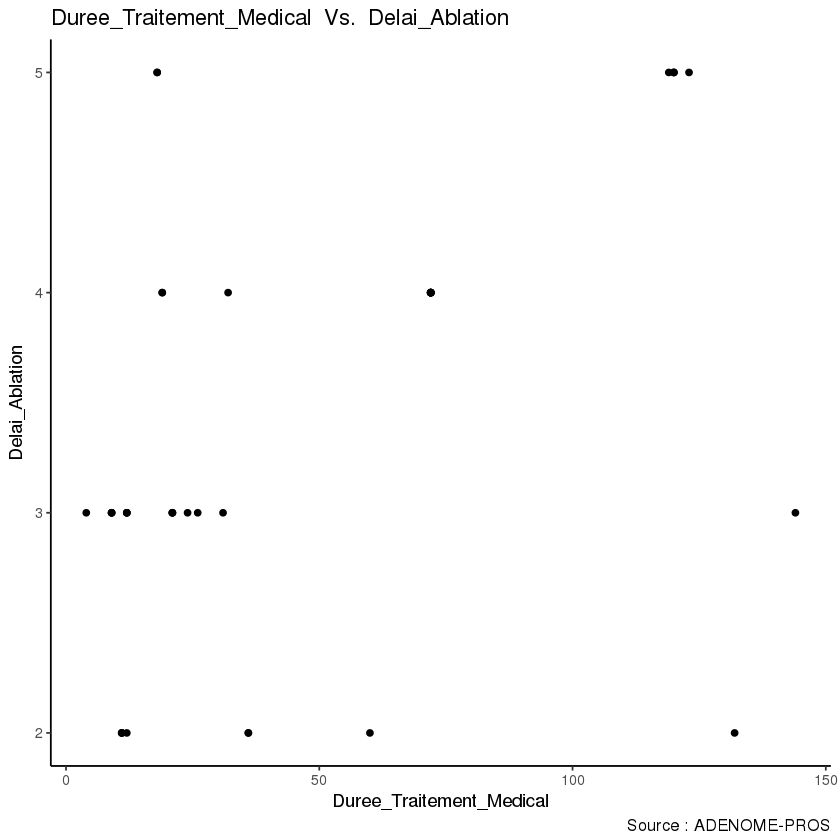

In [6]:
adenome_scatterplot(vapor_pre,vapor_pre$Volume_Prostatique,vapor_pre$Volume_Reseque,"Volume_Prostatique","Volume_Reseque")
adenome_scatterplot(vapor_pre,vapor_pre$Qmax,vapor_pre$IPSS,"Qmax","IPSS")
adenome_scatterplot(vapor_pre,vapor_pre$Volume_Prostatique,vapor_pre$Tmps_OP,"Volume_Prostatique","Tmps_OP")
adenome_scatterplot(vapor_pre,vapor_pre$Delai_ablation,vapor_pre$Volume_Prostatique,"Delai_ablation","Volume_Prostatique")
adenome_scatterplot(vapor_pre,vapor_pre$Duree_Traitement_Medical,vapor_pre$Delai_ablation,"Duree_Traitement_Medical","Delai_Ablation")

### 1.1.3 Corrélations de Kendall

Le coefficient de corrélation de Kendall est basé sur les rangs.

In [8]:
mat_cor_vapor_cat_pre = cor(vapor_cat_pre, method = c("kendall"))

ERROR: Error in cor(vapor_cat_pre, method = c("kendall")): 'x' must be numeric


# 1.2 Post-opératoire

### 1.2.1 Distributions

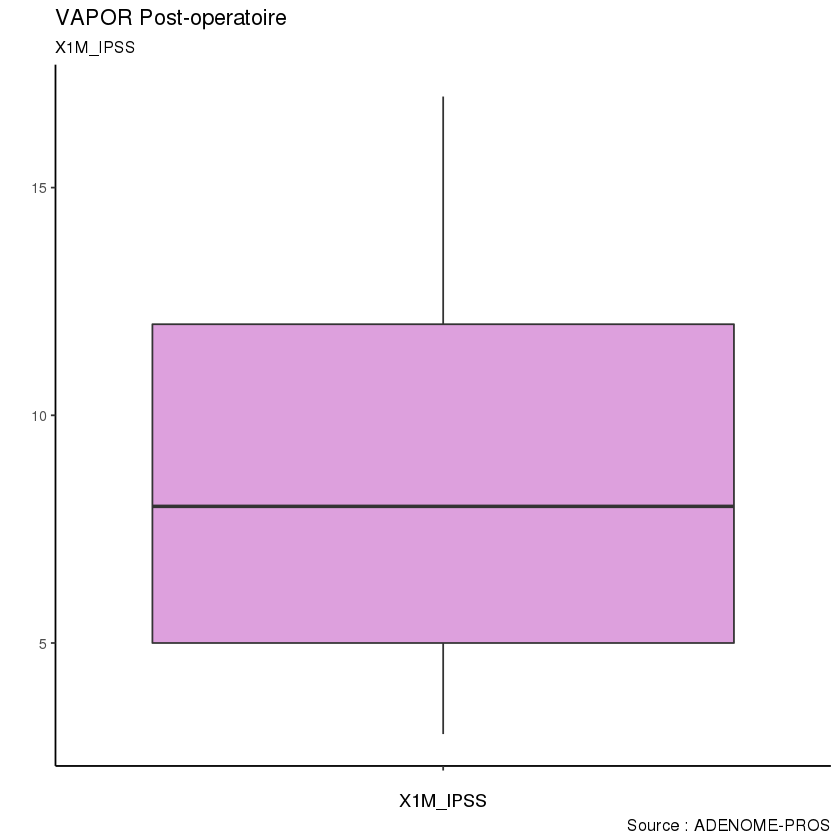

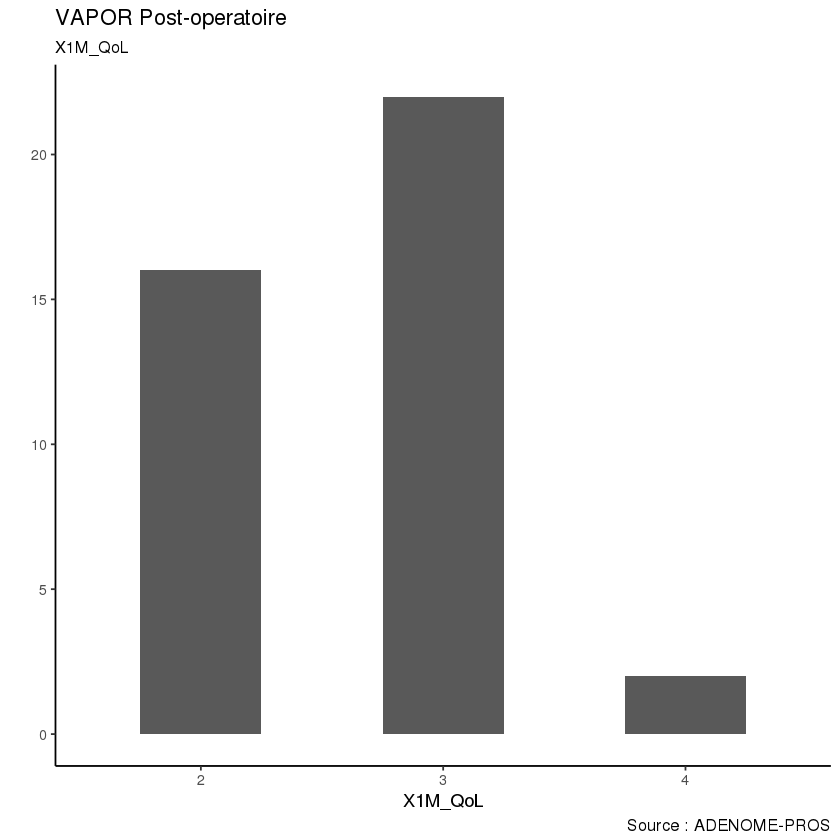

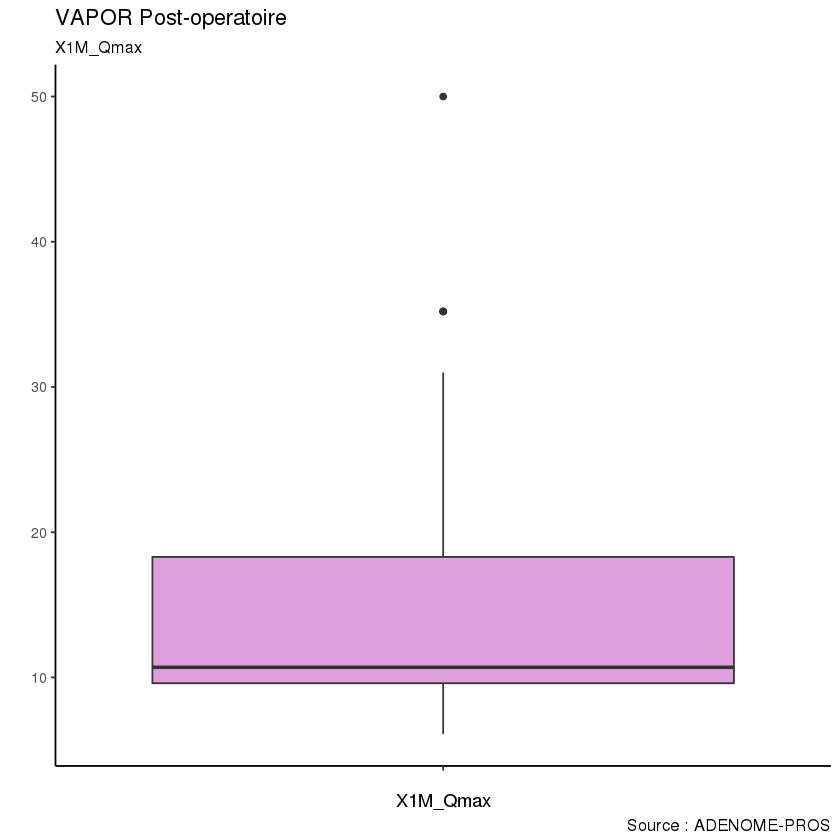

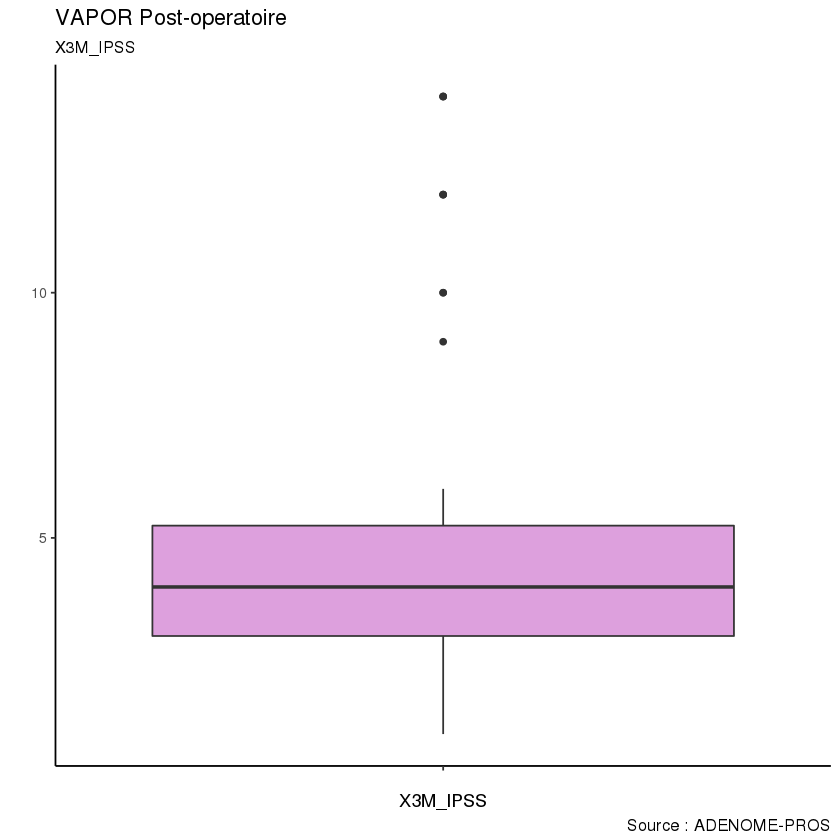

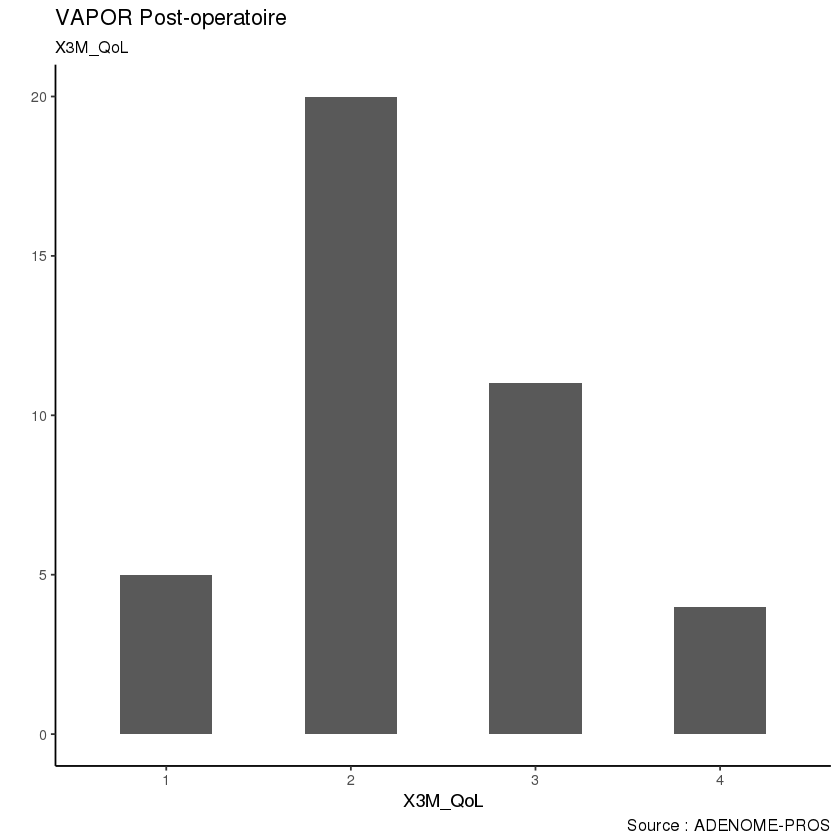

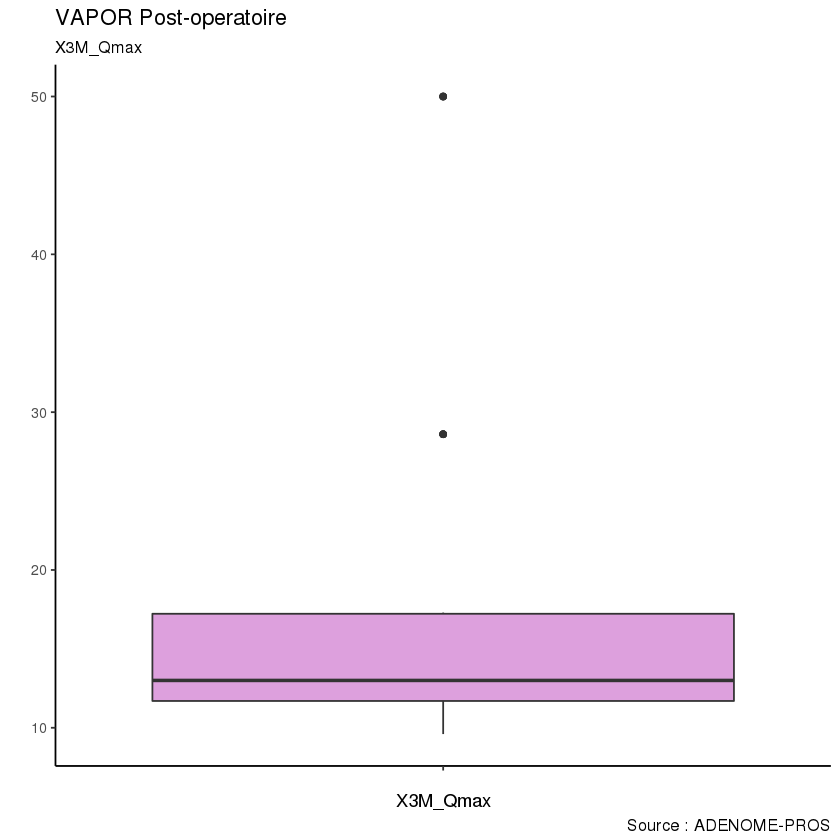

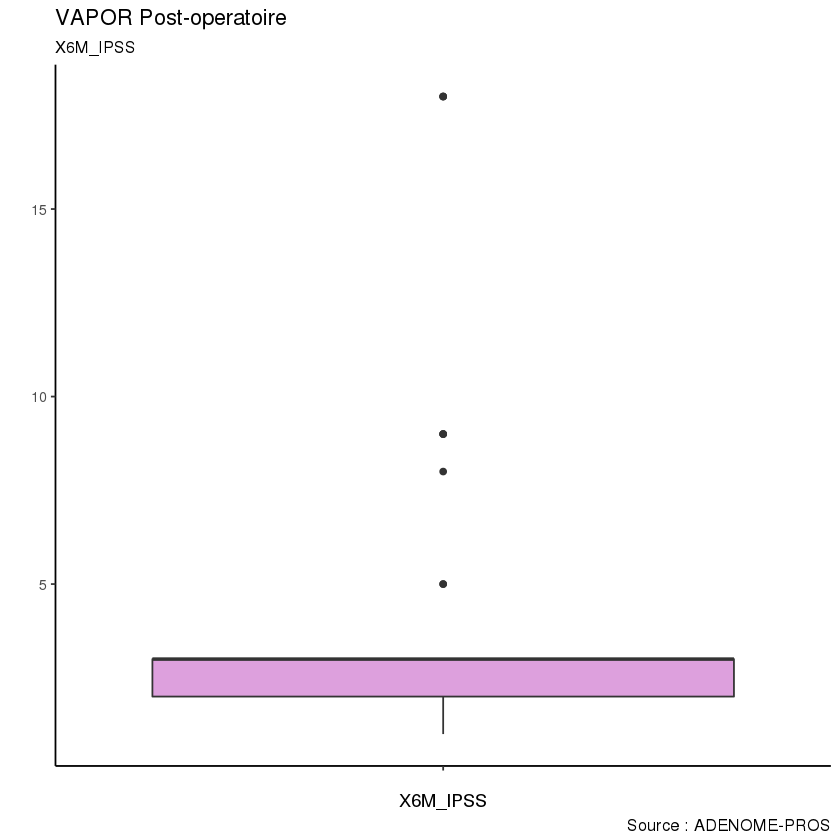

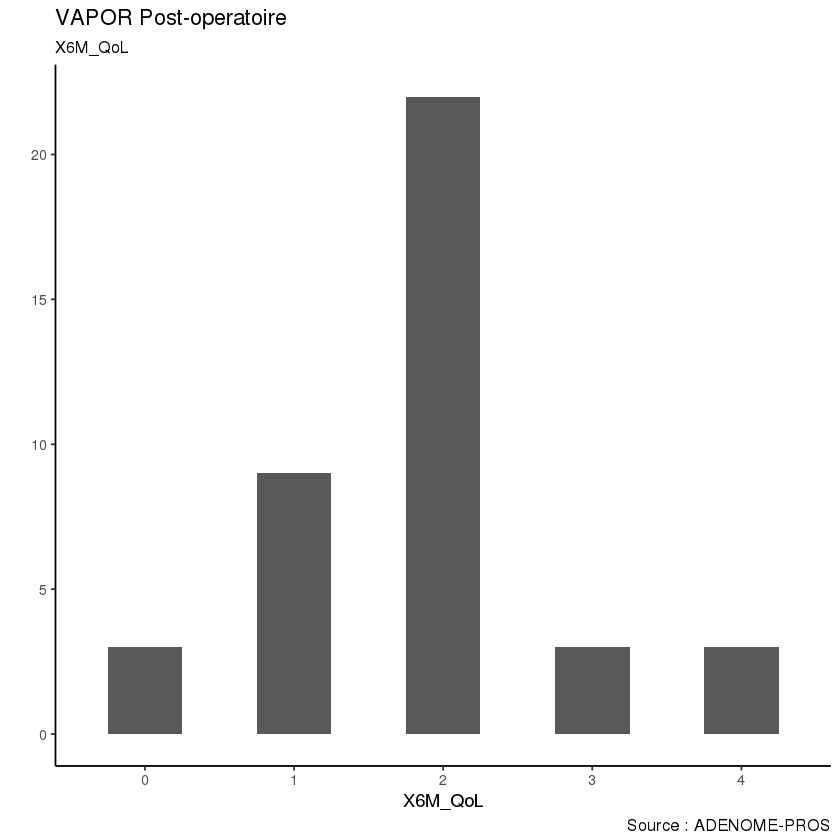

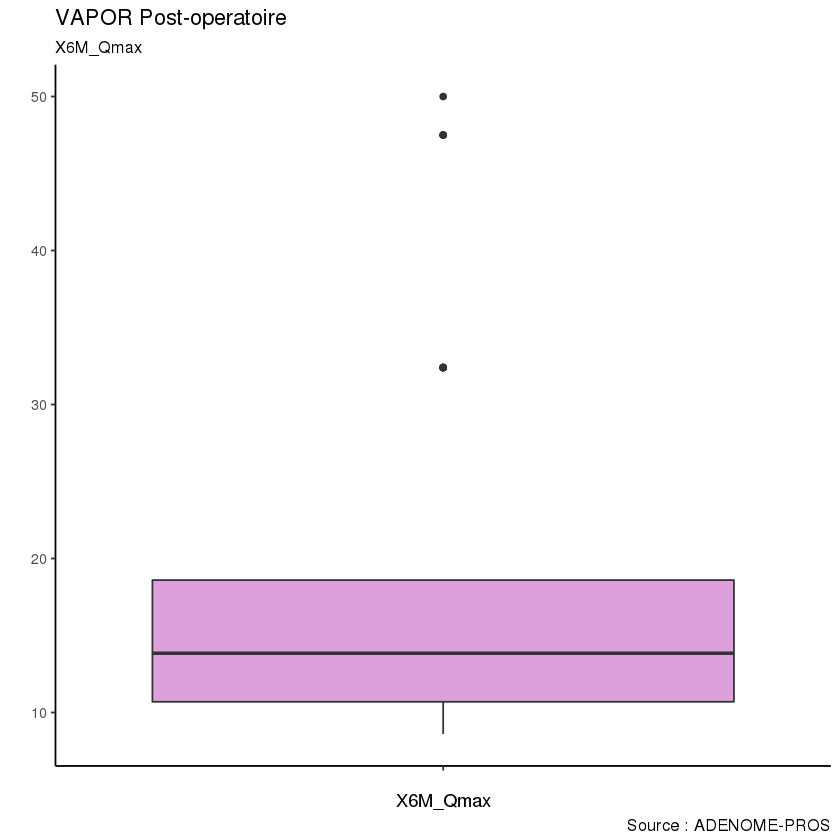

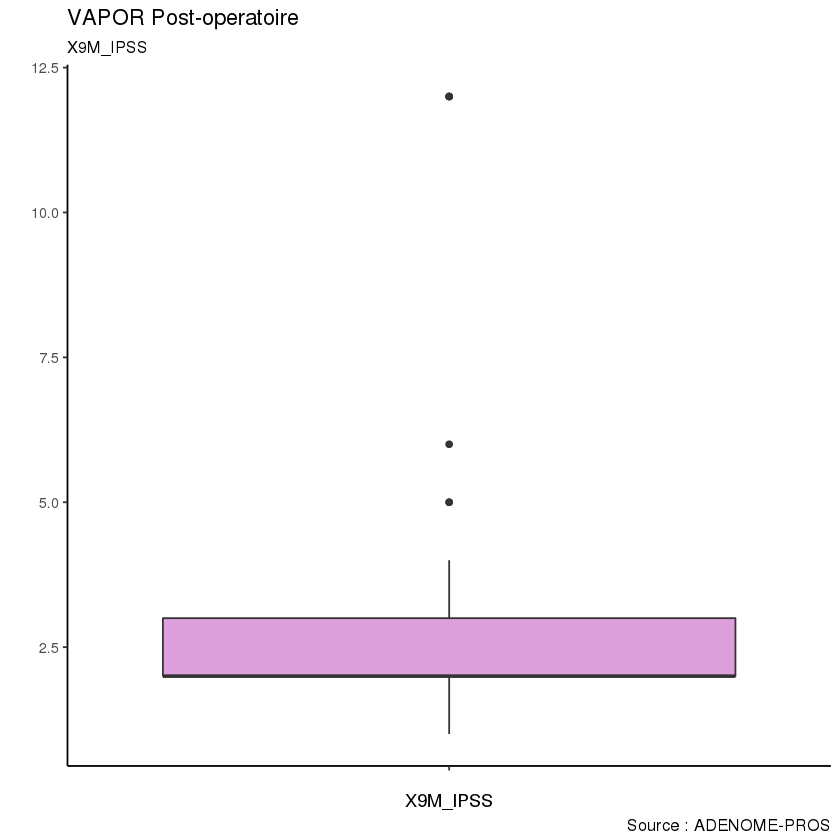

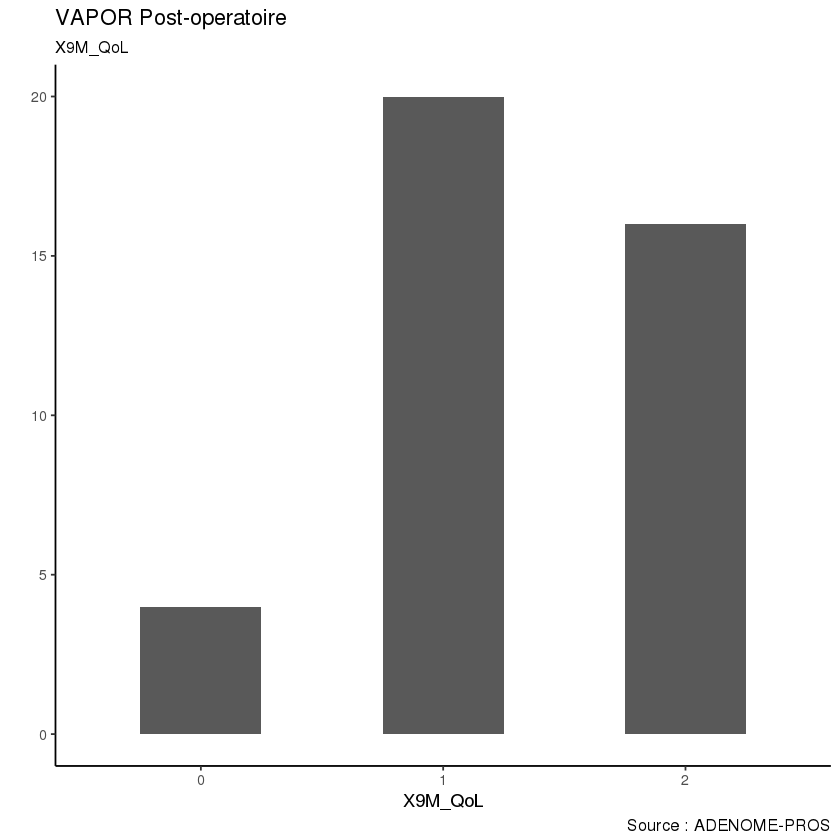

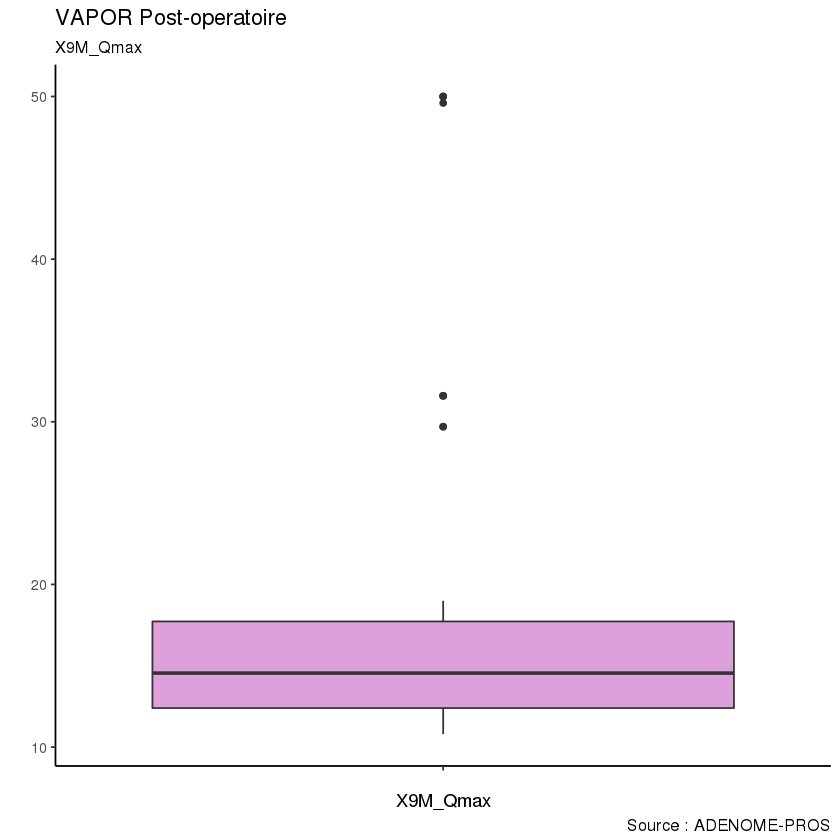

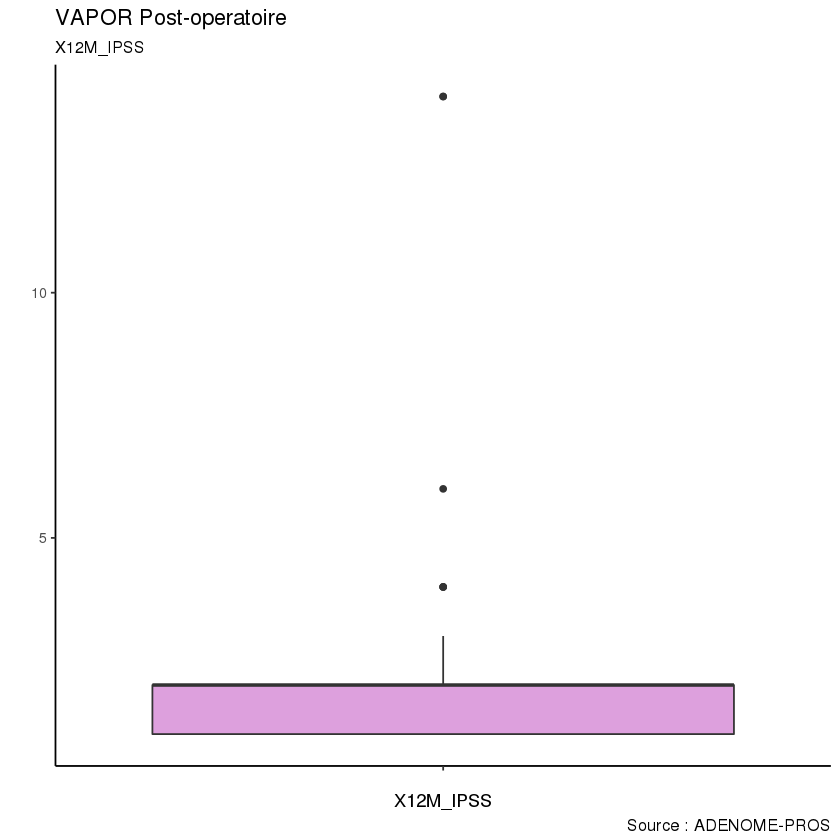

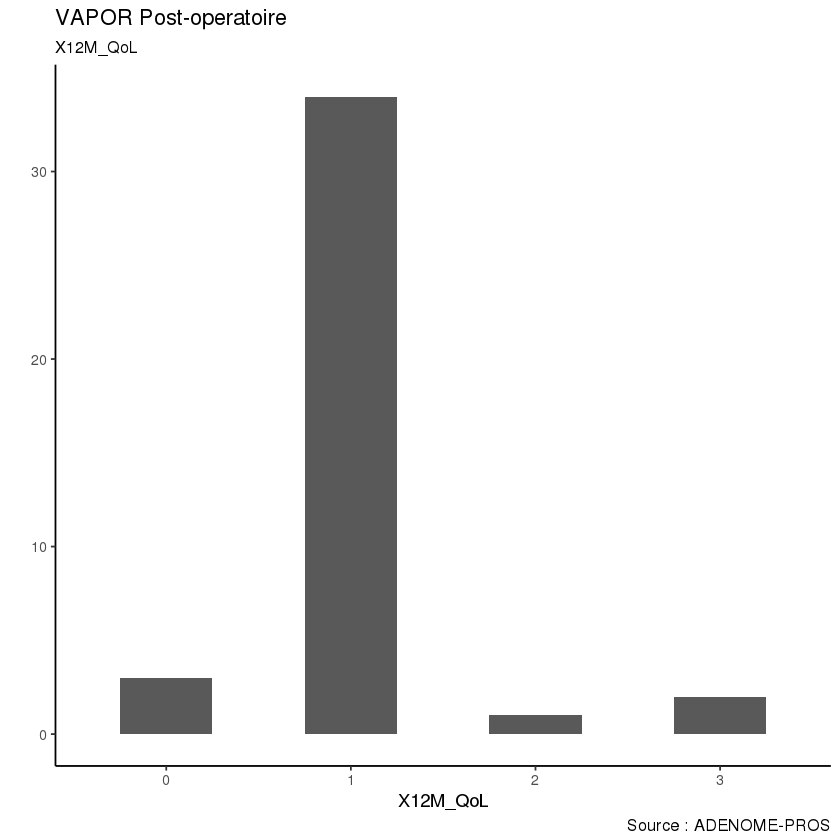

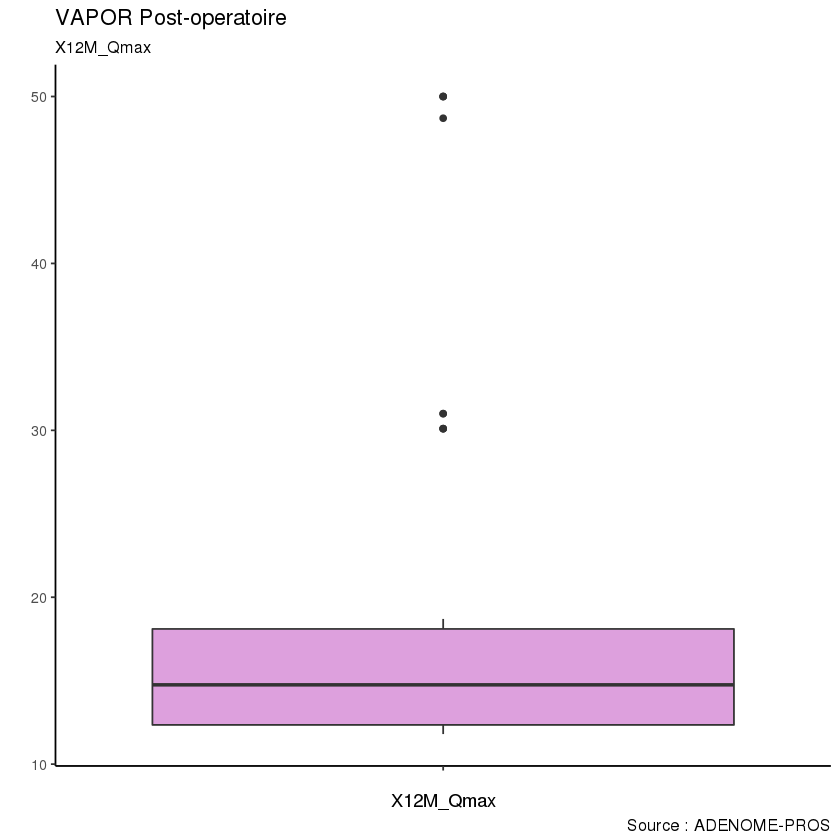

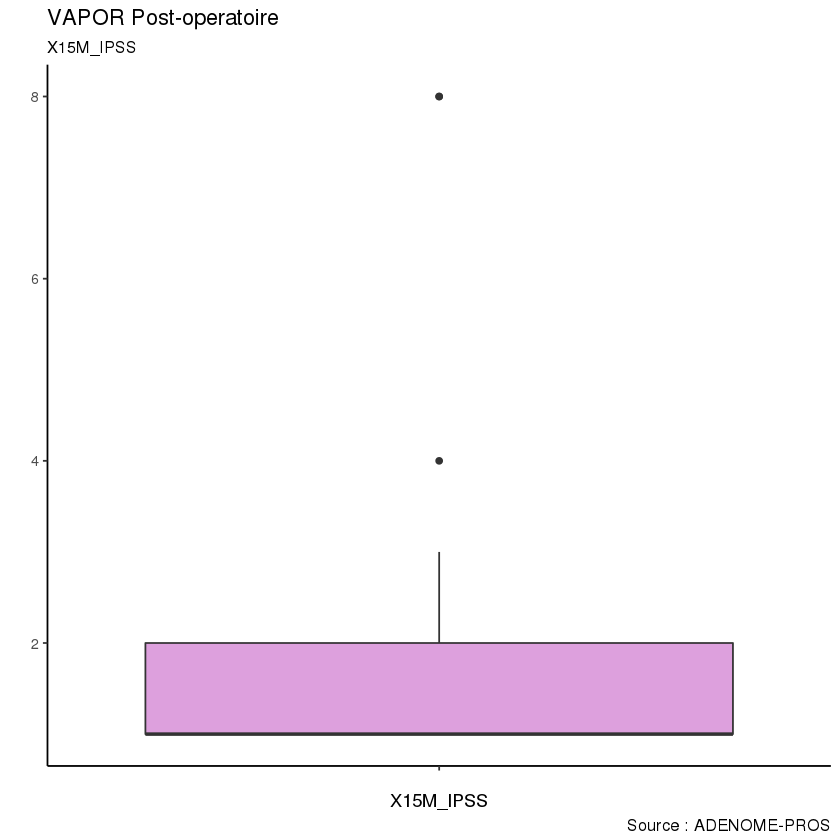

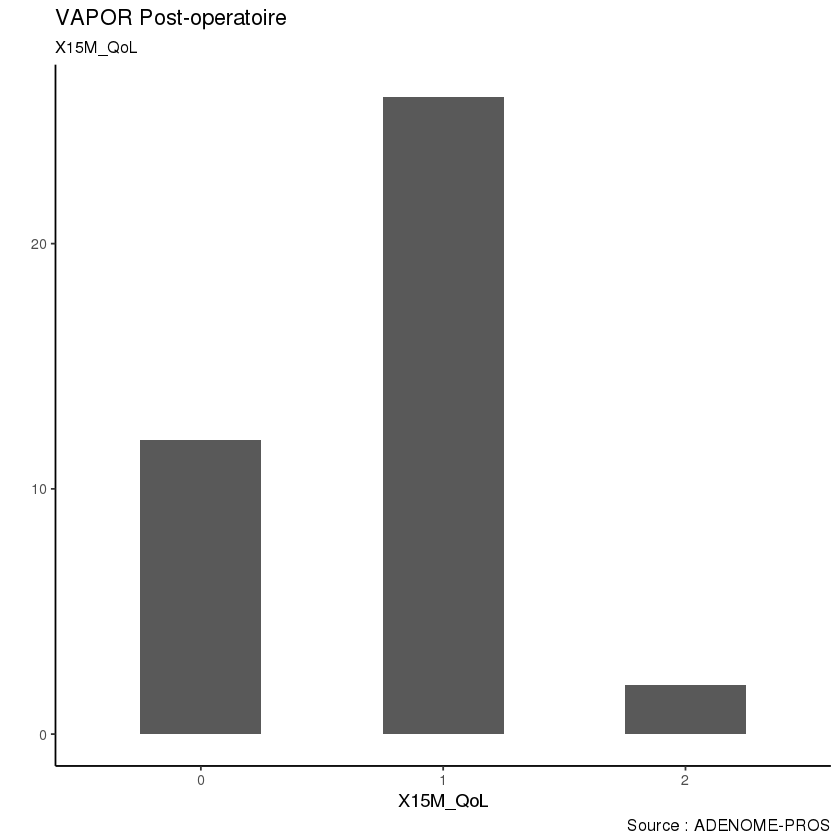

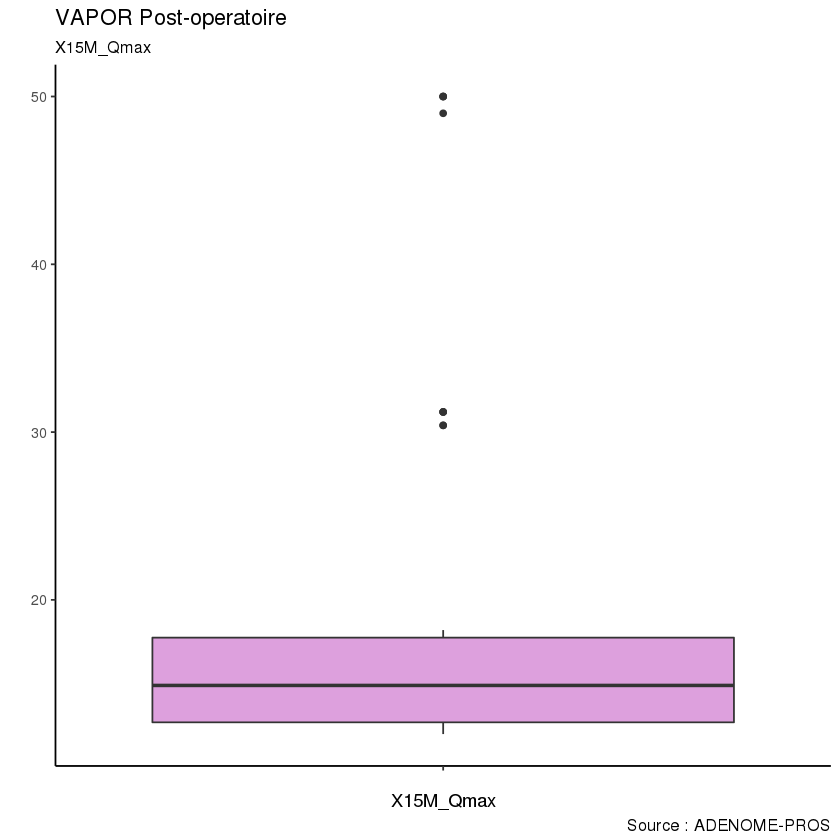

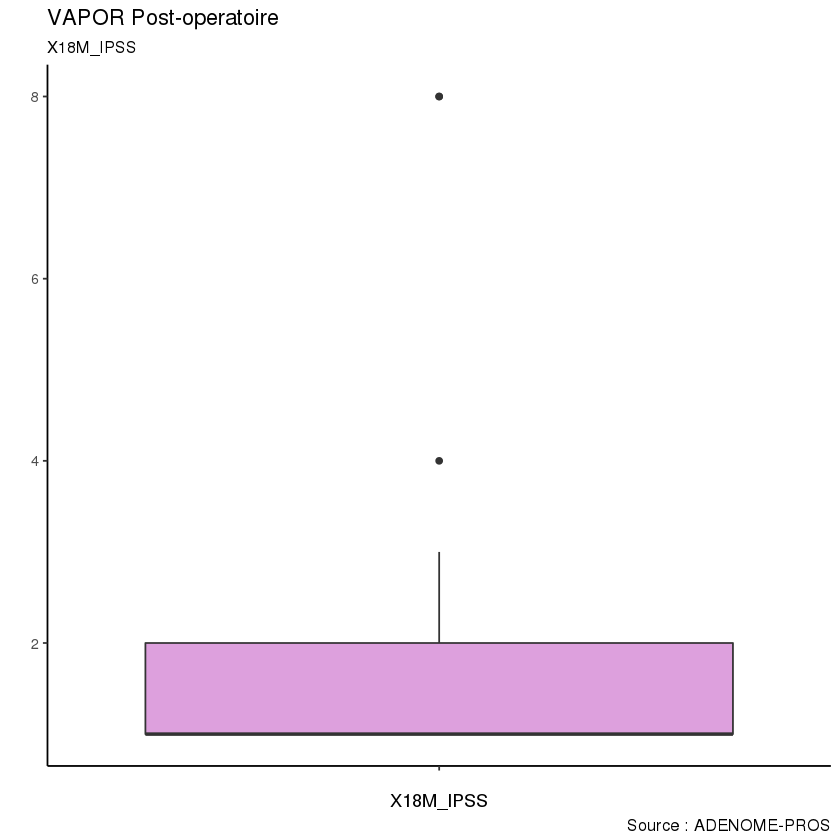

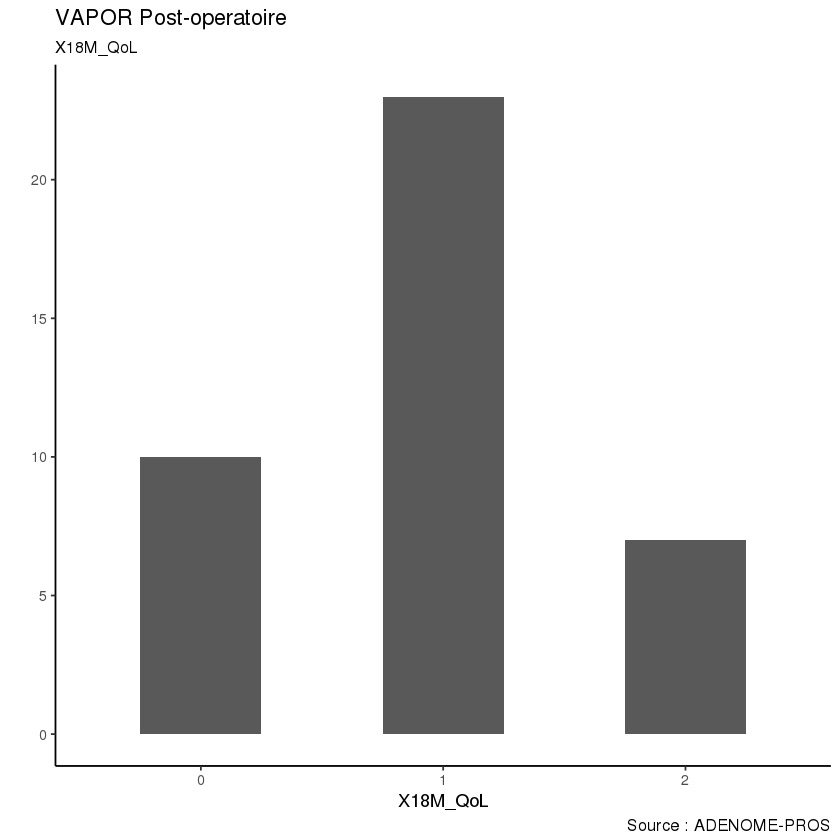

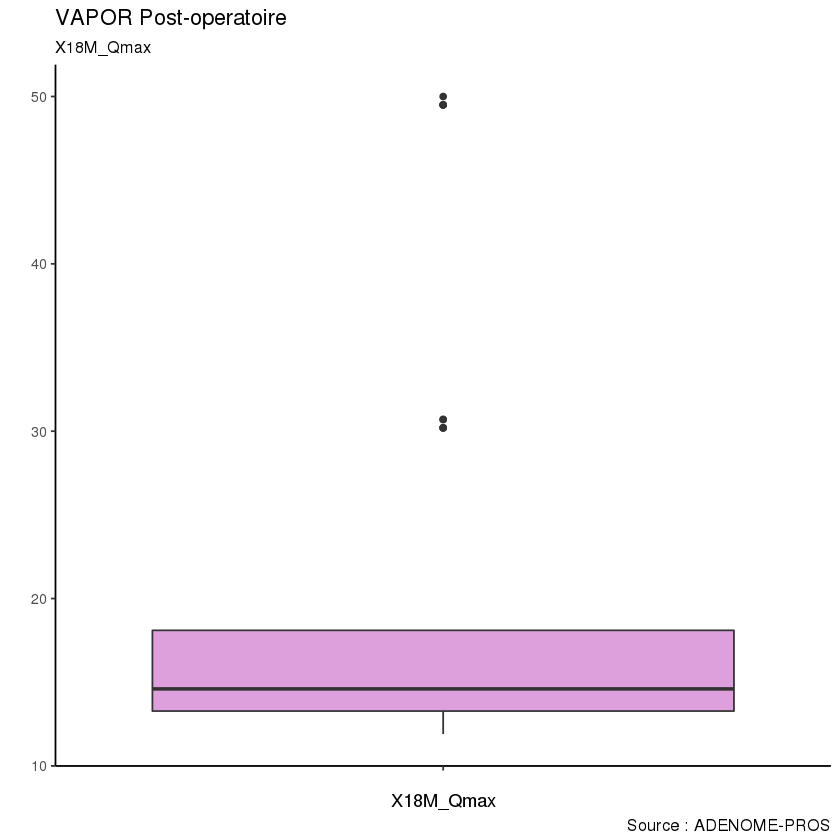

In [25]:
# Boxplots des variables numériques et barplots des variables catégoriques

for (i in 1:ncol(vapor_post)) {
  #x11(display="")
  if (is.numeric(vapor_post[,i]) || is.integer(vapor_post[,i])) {
    adenome_boxplot(vapor_post,i,"VAPOR Post-operatoire")
  }
  else
    adenome_barplot(vapor_post,i,"VAPOR Post-operatoire")
}

### 1.2.2 Corrélations entre les variables post-opératoire

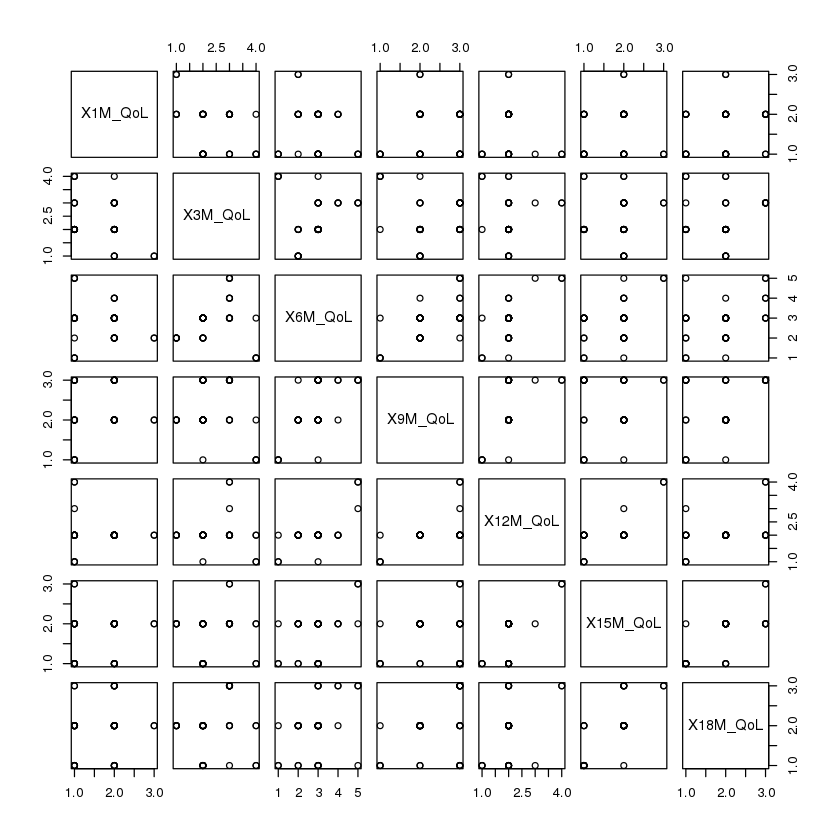

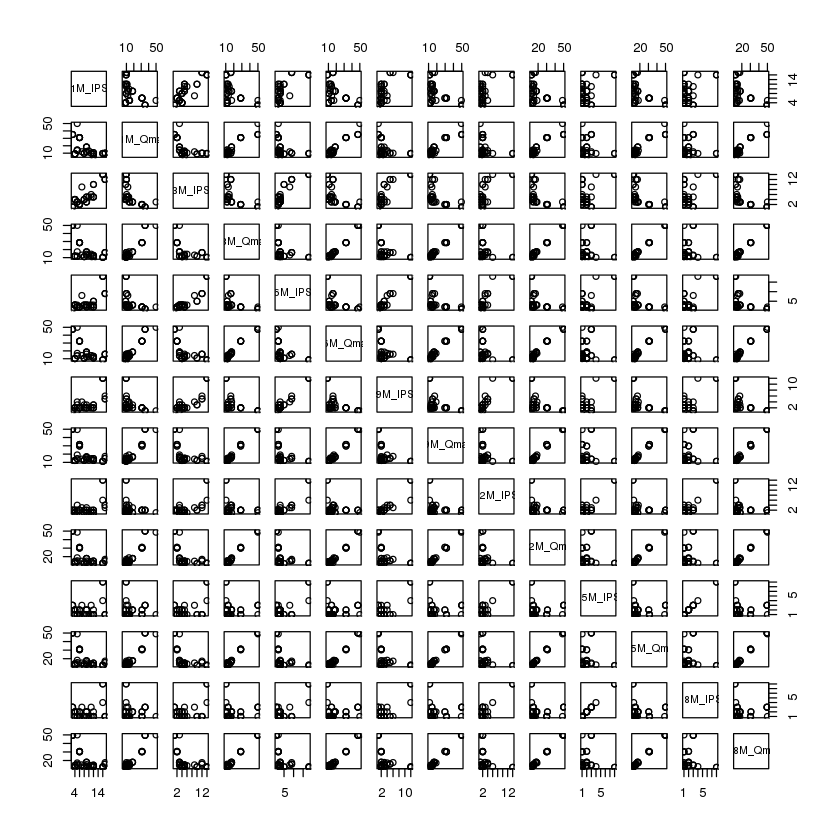

In [26]:
plot(vapor_cat_post)
plot(vapor_num_post)

# 2. Analyse des données RTUPB-VBPPS

## 2.1 Pré-opératoire

### 2.1.1 Distributions

In [ ]:
# Boxplots des variables numériques et barplots des variables catégoriques

for (i in 1:ncol(rtupb_pre)) {
  if (is.numeric(rtupb_pre[,i]) || is.integer(rtupb_pre[,i])) {
    adenome_boxplot(rtupb_pre,i,"RTUPB-VPSS Pre-operatoire")
  }
  else
    adenome_barplot(rtupb_pre,i,"RTUPB-VPSS Pre-operatoire")
}

### 2.1.2 Corrélations Pearson sur variables numériques

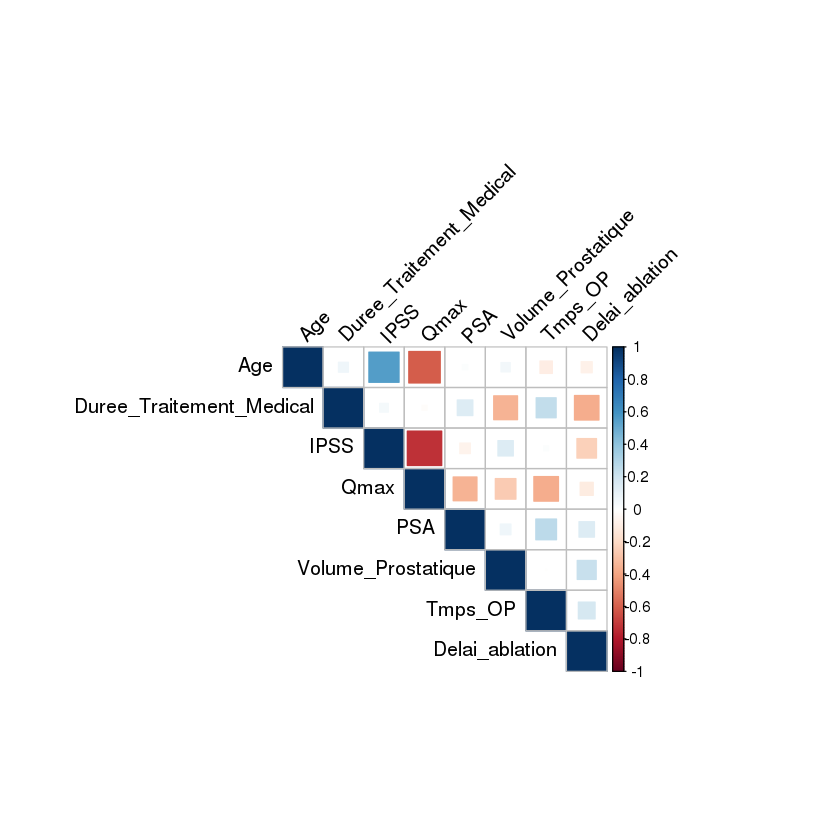

In [30]:
mat_cor_rtupb_num_pre = cor( subset(rtupb_num_pre,select=-c(Residu_post_mictionnel,Volume_Reseque)), method = c("pearson"))
corrplot(mat_cor_rtupb_num_pre, type="upper",tl.col="black", tl.srt=45,method="square")

Pour les techniques RTUPB-VPSS, en pré-opératoire,, nous notons une correlation entre IPSS et Age. Plus le patient est agé, plus il est gêné. Nous notons également deux corrélations inverses avec Qmax :
Age
IPSS Plus la miction est de bonne qualité, moins le patient est gêné. Plus le patient est agé, moins la miction est de bonne qualité.
Les scatterplots dessous apportent une vue graphique de ces observations.

In [ ]:
adenome_scatterplot(rtupb_pre,rtupb_pre$Age,rtupb_pre$IPSS,"Age","IPSS")
adenome_scatterplot(rtupb_pre,rtupb_pre$Age,rtupb_pre$Qmax,"Age","Qmax")
adenome_scatterplot(rtupb_pre,rtupb_pre$Qmax,rtupb_pre$IPSS,"Qmax","IPSS")

## 2.2 Post-opératoire

### 2.2.1 Distributions

In [ ]:
# Boxplots des variables numériques et barplots des variables catégoriques

for (i in 1:ncol(rtupb_post)) {
  if (is.numeric(rtupb_post[,i]) || is.integer(rtupb_post[,i])) {
    adenome_boxplot(rtupb_post,i,"RTUPB-VPSS Post-operatoire")
  }
  else
    adenome_barplot(rtupb_post,i,"RTUPB-VPSS Post-operatoire")
}

In [ ]:
### .2.2.2 Corrélations entre les variables Post-Opératoire

In [ ]:
plot(rtupb_cat_post)
plot(rtupb_num_post)

# 3. Classification

## 3.1 PAM pour les données VAPOR

### 3.1.1 Pré-opératoire

In [ ]:
vapor_small=subset(vapor,select=-c(Technique))
vapor_small_pre=vapor_small[1:19]
vapor_small_post=vapor_small[20:40]
resu_pam_vapor=pam(daisy(vapor_small_pre),14)
plot(resu_pam_vapor)